hourly-daily available capacity, daily bid
prices, daily market clearing prices as well as daily aggregate demand, water storage and
inflow levels. 

In [1]:
#librerias
import pandas as pd
import numpy as np

# 1. Datos

## Precios declarados (daily bid prices op1)

In [2]:
#precio de mercado energia mayorista
#nota: aca seria a nivel plata y configuracion, pero el problema es que el resto no están en ese nivel
archivo = "PreciodeOfertaDeclarado.csv"
df_declarado = pd.read_csv(archivo, sep=";", encoding="utf-8")
df_declarado


,CodigoVariable,Fecha,CodigoDuracion,UnidadMedida,CodigoPlanta,Configuracion,Valor
0,POF_Declarado,18/04/2025,PT1D,COP/kWh,ESMR,0,103.76
1,POF_Declarado,18/04/2025,PT1D,COP/kWh,TDR1,0,2306.46
2,POF_Declarado,18/04/2025,PT1D,COP/kWh,URA1,0,250.00
3,POF_Declarado,18/04/2025,PT1D,COP/kWh,CLMG,0,920.00
4,POF_Declarado,18/04/2025,PT1D,COP/kWh,TFL4,4,1534.69
...,...,...,...,...,...,...,...
20029,POF_Declarado,18/06/2025,PT1D,COP/kWh,TSJ1,0,287.00
20030,POF_Declarado,18/06/2025,PT1D,COP/kWh,GVIO,0,103.50
20031,POF_Declarado,18/06/2025,PT1D,COP/kWh,MRL1,0,947.87
20032,POF_Declarado,18/06/2025,PT1D,COP/kWh,TSR1,9,887.56


In [3]:
df_declarado[df_declarado['CodigoPlanta']=='TFL4']['Configuracion'].unique()

array([4, 3, 2, 1])

In [4]:
# mi id es Planta_Configuracion
df_declarado['Planta_Configuracion'] = df_declarado['CodigoPlanta'].astype(str) + "_" + df_declarado['Configuracion'].astype(str)
df_declarado[['CodigoPlanta', 'Configuracion', 'Planta_Configuracion']]


,CodigoPlanta,Configuracion,Planta_Configuracion
0,ESMR,0,ESMR_0
1,TDR1,0,TDR1_0
2,URA1,0,URA1_0
3,CLMG,0,CLMG_0
4,TFL4,4,TFL4_4
...,...,...,...
20029,TSJ1,0,TSJ1_0
20030,GVIO,0,GVIO_0
20031,MRL1,0,MRL1_0
20032,TSR1,9,TSR1_9


In [5]:
df_declarado['Fecha'].min()

'1/04/2025'

In [6]:
df_declarado['Fecha'].max()

'9/09/2025'

In [7]:
df_declarado

,CodigoVariable,Fecha,CodigoDuracion,UnidadMedida,CodigoPlanta,Configuracion,Valor,Planta_Configuracion
0,POF_Declarado,18/04/2025,PT1D,COP/kWh,ESMR,0,103.76,ESMR_0
1,POF_Declarado,18/04/2025,PT1D,COP/kWh,TDR1,0,2306.46,TDR1_0
2,POF_Declarado,18/04/2025,PT1D,COP/kWh,URA1,0,250.00,URA1_0
3,POF_Declarado,18/04/2025,PT1D,COP/kWh,CLMG,0,920.00,CLMG_0
4,POF_Declarado,18/04/2025,PT1D,COP/kWh,TFL4,4,1534.69,TFL4_4
...,...,...,...,...,...,...,...,...
20029,POF_Declarado,18/06/2025,PT1D,COP/kWh,TSJ1,0,287.00,TSJ1_0
20030,POF_Declarado,18/06/2025,PT1D,COP/kWh,GVIO,0,103.50,GVIO_0
20031,POF_Declarado,18/06/2025,PT1D,COP/kWh,MRL1,0,947.87,MRL1_0
20032,POF_Declarado,18/06/2025,PT1D,COP/kWh,TSR1,9,887.56,TSR1_9


In [8]:
#Precio de oferta de la planta en el proceso del despacho ideal, en COP/kWh - https://www.simem.co/datadetail/B1189F52-1F3C-429B-B1C5-34AF0AC860F7
# Precio de oferta de la planta para cada configuración ofertada en el proceso del despacho ideal, en COP/kWh - https://www.simem.co/datadetail/B180058C-52DD-42C3-A93A-F44003AA2D43

## Precio de oferta de la planta en el proceso del despacho ideal, en COP/kWh (daily bid prices op2)

In [9]:
#nota: acá sería a nivel planta y no desgloso configuracion, una planta y ya 
archivo_oferta = "Preciodeofertaplanta.csv"
df_oferta = pd.read_csv(archivo_oferta, sep=",", encoding="utf-8")
df_oferta
#2024-09-01

,CodigoVariable,FechaHora,CodigoDuracion,UnidadMedida,CodigoPlanta,Version,Valor
0,POf_Original,2025-05-25 23:00:00,P1D,COP/kWh,TEC1,TXF,1486.46
1,POf_Original,2025-05-25 22:00:00,P1D,COP/kWh,TEC1,TXF,1486.46
2,POf_Original,2025-05-25 21:00:00,P1D,COP/kWh,TEC1,TXF,1486.46
3,POf_Original,2025-05-25 20:00:00,P1D,COP/kWh,TEC1,TXF,1486.46
4,POf_Original,2025-05-25 19:00:00,P1D,COP/kWh,TEC1,TXF,1486.46
...,...,...,...,...,...,...,...
670603,POf_Original,2025-07-13 04:00:00,P1D,COP/kWh,ZPA2,TX4,379.71
670604,POf_Original,2025-07-13 03:00:00,P1D,COP/kWh,ZPA2,TX4,379.71
670605,POf_Original,2025-07-13 02:00:00,P1D,COP/kWh,ZPA2,TX4,379.71
670606,POf_Original,2025-07-13 01:00:00,P1D,COP/kWh,ZPA2,TX4,379.71


## Precio de bolsa horario (daily market clearing prices)

In [10]:
#precio mercado spot
archivo_bolsa = "Preciodebolsahorario.csv"
df_bolsa = pd.read_csv(archivo_bolsa, sep=",", encoding="utf-8")
df_bolsa

,CodigoVariable,FechaHora,CodigoDuracion,UnidadMedida,Version,Valor
0,PB_Int,2025-06-01 00:00:00,PT1H,COP/kWh,TX2,193.75
1,PB_Int,2025-06-01 01:00:00,PT1H,COP/kWh,TX2,193.75
2,PB_Int,2025-06-01 02:00:00,PT1H,COP/kWh,TX2,193.75
3,PB_Int,2025-06-01 03:00:00,PT1H,COP/kWh,TX2,193.75
4,PB_Int,2025-06-01 04:00:00,PT1H,COP/kWh,TX2,193.75
...,...,...,...,...,...,...
59443,PB_Tie,2025-05-18 19:00:00,PT1H,COP/kWh,TXF,106.39
59444,PB_Tie,2025-05-18 20:00:00,PT1H,COP/kWh,TXF,106.39
59445,PB_Tie,2025-05-18 21:00:00,PT1H,COP/kWh,TXF,106.39
59446,PB_Tie,2025-05-18 22:00:00,PT1H,COP/kWh,TXF,102.64


## Disponibilidad Comercial por Planta (hourly-daily available capacity)

Es la disponibilidad calculada por el Sistema de Intercambios Comerciales, la cual considera la declaración de disponibilidad de las plantas de generación, modificada cuando se presenten cambios en las unidades de generación en la operación real del sistema resolución CREG 024 del 095

Saber cuánta energía puede generar cada planta en cada hora

In [11]:
#https://www.simem.co/datadetail/24F4EC70-2DA0-4551-A188-FA750A7D66A5

julio = pd.read_csv("Disponibilidadcomercialporplantajulio.csv", sep=',', encoding='utf-8')
septiembre = pd.read_csv("Disponibilidadcomercialporplantaseptiembre.csv", sep=',', encoding='utf-8')

# Concatenar verticalmente
df_capacity = pd.concat([julio, septiembre], axis=0)

# Eliminar duplicados exactos
df_capacity = df_capacity.drop_duplicates()
df_capacity = df_capacity.reset_index(drop=True)
df_capacity


#nota: si hay algo que no aparezca es porque sus cantidades disponibles en esa hora eran 0



,CodigoVariable,FechaHora,CodigoDuracion,UnidadMedida,Version,Valor,CodigoPlanta
0,DispCom,2025-05-25 16:00:00,PT1H,kWh,TX3,148.56,3ACC
1,DispCom,2025-05-25 15:00:00,PT1H,kWh,TX3,2706.61,3ACC
2,DispCom,2025-05-25 14:00:00,PT1H,kWh,TX3,3574.43,3ACC
3,DispCom,2025-05-25 13:00:00,PT1H,kWh,TX3,3642.49,3ACC
4,DispCom,2025-05-25 12:00:00,PT1H,kWh,TX3,5078.19,3ACC
...,...,...,...,...,...,...,...
2946659,DispCom,2025-08-10 04:00:00,PT1H,kWh,TX1,2825.03,VNTB
2946660,DispCom,2025-08-10 03:00:00,PT1H,kWh,TX1,2842.82,VNTB
2946661,DispCom,2025-08-10 02:00:00,PT1H,kWh,TX1,2855.33,VNTB
2946662,DispCom,2025-08-10 01:00:00,PT1H,kWh,TX1,2869.57,VNTB


In [12]:
#verificando que estas sean las capacidades declaradas, porque despues aparecen en equilibrio. Rta: sí coinciden

In [13]:
df_capacity[
    (df_capacity['CodigoPlanta'] == '2QBW') &
    (df_capacity['FechaHora'].astype(str).str.contains('2025-08-11 00:00:00'))
]

,CodigoVariable,FechaHora,CodigoDuracion,UnidadMedida,Version,Valor,CodigoPlanta
2257328,DispCom,2025-08-11 00:00:00,PT1H,kWh,TX2,18008.4,2QBW
2263080,DispCom,2025-08-11 00:00:00,PT1H,kWh,TX1,18008.4,2QBW


In [14]:
df_capacity[
    (df_capacity['CodigoPlanta'] == '2QEK') &
    (df_capacity['FechaHora'].astype(str).str.contains('2025-08-11 00:00:00'))
]

,CodigoVariable,FechaHora,CodigoDuracion,UnidadMedida,Version,Valor,CodigoPlanta
2253197,DispCom,2025-08-11 00:00:00,PT1H,kWh,TX2,35000.0,2QEK
2261712,DispCom,2025-08-11 00:00:00,PT1H,kWh,TX1,35000.0,2QEK


## Pronóstico del CND de demanda por Área operativa (daily aggregate demand)

In [15]:
#https://www.simem.co/datadetail/A016BAC9-EAA1-45BB-8DB2-AE01600E1D18
archivo_pronostico= "PronósticodelCNDdedemandaporÁreaoperativa.csv"
df_pronostico = pd.read_csv(archivo_pronostico, sep=",", encoding="utf-8")
df_pronostico



,FechaPublicacion,FechaHora,CodigoDuracion,CodigoAreaOperativa,PronDem
0,2025-05-01,2025-04-05 00:00:00,PT1H,Are0002,1017494.3
1,2025-05-01,2025-04-05 01:00:00,PT1H,Are0002,975345.5
2,2025-05-01,2025-04-05 02:00:00,PT1H,Are0002,946246.0
3,2025-05-01,2025-04-05 03:00:00,PT1H,Are0002,937971.4
4,2025-05-01,2025-04-05 04:00:00,PT1H,Are0002,963633.8
...,...,...,...,...,...
19435,2025-06-01,2025-05-22 19:00:00,PT1H,Are0128,2325697.5
19436,2025-06-01,2025-05-22 20:00:00,PT1H,Are0128,2237126.5
19437,2025-06-01,2025-05-22 21:00:00,PT1H,Are0128,2014845.2
19438,2025-06-01,2025-05-22 22:00:00,PT1H,Are0128,1825030.4


In [16]:
df_pronostico_agg = (
    df_pronostico.groupby("FechaHora", as_index=False)["PronDem"]
      .sum()
      .rename(columns={"PronDem": "daily_agg_demand"})
)
df_pronostico_agg #lo que se pronosticó demandado

,FechaHora,daily_agg_demand
0,2025-04-01 00:00:00,8381365.2
1,2025-04-01 01:00:00,8102281.3
2,2025-04-01 02:00:00,7913273.6
3,2025-04-01 03:00:00,7823041.2
4,2025-04-01 04:00:00,7999010.4
...,...,...
3883,2025-09-09 19:00:00,11599381.0
3884,2025-09-09 20:00:00,11396855.1
3885,2025-09-09 21:00:00,10584341.3
3886,2025-09-09 22:00:00,9935794.2


## Despacho programado recursos de generación (cantidades de equilibrio)


Contiene el programa de generación del despacho económico en kW, cotejar info con pronostico CND, tmb insumo para cantidades declaradas

In [17]:
#https://www.simem.co/datadetail/FF027B64-9896-4844-B827-9DC05F690668
archivo_despacho = "Despachoprogramadorecursosdegeneracion.csv"
df_despacho = pd.read_csv(archivo_despacho, sep=",", encoding="utf-8")
df_despacho
#valor es kW

,FechaHora,CodigoDuracion,CodigoElementoGeneracion,Valor
0,2025-08-11 00:00:00,PT1H,2QBW,18380
1,2025-08-11 00:00:00,PT1H,2QEK,35000
2,2025-08-11 00:00:00,PT1H,2QRL,650
3,2025-08-11 00:00:00,PT1H,2QV2,6000
4,2025-08-11 00:00:00,PT1H,2R22,18000
...,...,...,...,...
1264514,2025-04-05 23:00:00,PT1H,SLVJ,95000
1264515,2025-04-05 23:00:00,PT1H,SMI1,25000
1264516,2025-04-05 23:00:00,PT1H,SNC1,700
1264517,2025-04-05 23:00:00,PT1H,SNCR,729000


In [18]:
df_despacho_agg = (
    df_despacho.groupby("FechaHora", as_index=False)["Valor"]
      .sum()
      .rename(columns={"Valor": "daily_eq_demand"})
)
df_despacho_agg #fue lo que se despachó al final demandado

,FechaHora,daily_eq_demand
0,2025-04-01 00:00:00,8634480
1,2025-04-01 01:00:00,8343930
2,2025-04-01 02:00:00,8149800
3,2025-04-01 03:00:00,8060810
4,2025-04-01 04:00:00,8231010
...,...,...
3883,2025-09-09 19:00:00,11822380
3884,2025-09-09 20:00:00,11697040
3885,2025-09-09 21:00:00,11140860
3886,2025-09-09 22:00:00,10420020


In [19]:
df_despacho[df_despacho['CodigoElementoGeneracion']=='TFL4']

,FechaHora,CodigoDuracion,CodigoElementoGeneracion,Valor
8275,2025-07-02 01:00:00,PT1H,TFL4,120000
8582,2025-07-02 02:00:00,PT1H,TFL4,120000
8889,2025-07-02 03:00:00,PT1H,TFL4,120000
9196,2025-07-02 04:00:00,PT1H,TFL4,120000
9393,2025-07-02 05:00:00,PT1H,TFL4,120000
...,...,...,...,...
1263238,2025-04-05 17:00:00,PT1H,TFL4,0
1263578,2025-04-05 19:00:00,PT1H,TFL4,0
1263820,2025-04-05 20:00:00,PT1H,TFL4,0
1264020,2025-04-05 21:00:00,PT1H,TFL4,0


In [20]:
#otras opciones: Demanda comercial, en kWh. Demanda real, en kWh.

## Reservas hidraulicas

In [21]:
#https://www.simem.co/datadetail/9605B04C-8D3A-40A9-94D3-5535670D2F9A
archivo_hidraulica = "ReservasHidráulicas.csv"
df_hidraulica = pd.read_csv(archivo_hidraulica, sep=",", encoding="utf-8")
df_hidraulica


,FechaPublicacion,Fecha,CodigoDuracion,CodigoEmbalse,RegionHidrologica,VolumenUtilDiarioMasa,VolumenTotalMasa
0,2025-06-29,2025-06-28,P1D,ALTOANCH,Valle,11200000,17520000
1,2025-06-29,2025-06-28,P1D,ITUANGO,Antioquia,116260000,1415260000
2,2025-06-29,2025-06-28,P1D,PUNCHINA,Antioquia,42210000,56190000
3,2025-06-29,2025-06-28,P1D,PORCE3,Antioquia,79080000,108530000
4,2025-06-29,2025-06-28,P1D,BETANIA,Centro,673527000,1129027000
...,...,...,...,...,...,...,...
4353,2025-08-26,2025-08-25,P1D,TOMINE,CENTRO,398310000,398310000
4354,2025-08-26,2025-08-25,P1D,TRONERAS,Antioquia,7740000,16190000
4355,2025-08-26,2025-08-25,P1D,MUNA,Centro,11910000,11990000
4356,2025-08-26,2025-08-25,P1D,PORCE2,Antioquia,50140000,88930000


In [22]:
df_hidraulica_avg= (
    df_hidraulica
    .groupby('Fecha', as_index=False)[['VolumenUtilDiarioMasa', 'VolumenTotalMasa']]
    .mean()
)


Dias similares

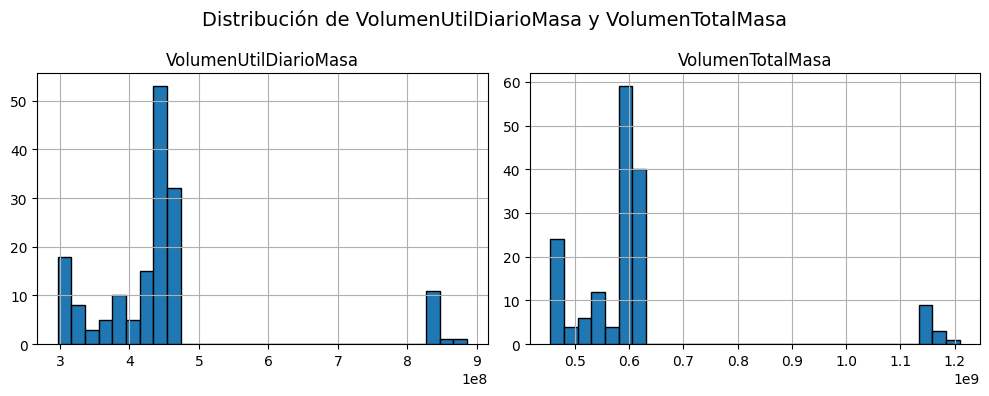

In [23]:
import matplotlib.pyplot as plt

# Lista de variables a graficar
vars_plot = ['VolumenUtilDiarioMasa', 'VolumenTotalMasa']

# Crea los histogramas uno al lado del otro
df_hidraulica_avg[vars_plot].hist(
    bins=30,           # número de barras
    figsize=(10, 4),   # tamaño del gráfico
    edgecolor='black'  # bordes para mejor visibilidad
)

plt.suptitle('Distribución de VolumenUtilDiarioMasa y VolumenTotalMasa', fontsize=14)
plt.tight_layout()
plt.show()


In [24]:
from sklearn.cluster import KMeans
import pandas as pd

# 1. Seleccionar la variable
X = df_hidraulica_avg[['VolumenUtilDiarioMasa']].values

# 2. Aplicar K-Means con 12 grupos
kmeans = KMeans(n_clusters=12, random_state=42)
df_hidraulica_avg['cluster'] = kmeans.fit_predict(X)

# 3. Reordenar los clusters según el valor medio (1 = menor, 12 = mayor)
cluster_means = (
    df_hidraulica_avg.groupby('cluster')['VolumenUtilDiarioMasa']
    .mean()
    .sort_values()
)
orden_map = {old: new + 1 for new, old in enumerate(cluster_means.index)}
df_hidraulica_avg['cluster'] = df_hidraulica_avg['cluster'].map(orden_map)

# 4. Verificar
print(df_hidraulica_avg[['Fecha', 'VolumenUtilDiarioMasa', 'cluster']].head())

# 5. Resumen por cluster
resumen = (
    df_hidraulica_avg.groupby('cluster')['VolumenUtilDiarioMasa']
    .agg(['count', 'mean', 'min', 'max'])
    .sort_index()
)
print(resumen)


        Fecha  VolumenUtilDiarioMasa  cluster
0  2025-04-01           2.969186e+08        1
1  2025-04-02           2.970081e+08        1
2  2025-04-03           2.971947e+08        1
3  2025-04-04           2.981375e+08        1
4  2025-04-05           3.019760e+08        1
         count          mean           min           max
cluster                                                 
1           24  3.099078e+08  2.969186e+08  3.217660e+08
2            5  3.377511e+08  3.241564e+08  3.503973e+08
3            6  3.670548e+08  3.582817e+08  3.764841e+08
4           13  3.950024e+08  3.882780e+08  4.060557e+08
5           14  4.239925e+08  4.119788e+08  4.286237e+08
6           37  4.384967e+08  4.323997e+08  4.414406e+08
7           12  4.456888e+08  4.423426e+08  4.487055e+08
8           25  4.548213e+08  4.503221e+08  4.596065e+08
9           13  4.644893e+08  4.600609e+08  4.722815e+08
10           8  8.354724e+08  8.315556e+08  8.396919e+08
11           4  8.455813e+08  8.409993e+

In [25]:
df_hidraulica_avg

,Fecha,VolumenUtilDiarioMasa,VolumenTotalMasa,cluster
0,2025-04-01,2.969186e+08,4.542842e+08,1
1,2025-04-02,2.970081e+08,4.544695e+08,1
2,2025-04-03,2.971947e+08,4.545602e+08,1
3,2025-04-04,2.981375e+08,4.564693e+08,1
4,2025-04-05,3.019760e+08,4.593416e+08,1
...,...,...,...,...
157,2025-09-05,8.368711e+08,1.151515e+09,10
158,2025-09-06,8.368356e+08,1.151479e+09,10
159,2025-09-07,8.450015e+08,1.159645e+09,11
160,2025-09-08,8.504281e+08,1.165072e+09,11


In [26]:
df_hidraulica['Fecha'].min()

'2025-04-01'

# 2. Procesamiento de datos

In [27]:
df_oferta[['FechaHora', 'CodigoPlanta', 'Valor']]

,FechaHora,CodigoPlanta,Valor
0,2025-05-25 23:00:00,TEC1,1486.46
1,2025-05-25 22:00:00,TEC1,1486.46
2,2025-05-25 21:00:00,TEC1,1486.46
3,2025-05-25 20:00:00,TEC1,1486.46
4,2025-05-25 19:00:00,TEC1,1486.46
...,...,...,...
670603,2025-07-13 04:00:00,ZPA2,379.71
670604,2025-07-13 03:00:00,ZPA2,379.71
670605,2025-07-13 02:00:00,ZPA2,379.71
670606,2025-07-13 01:00:00,ZPA2,379.71


In [28]:
df_bolsa[['FechaHora', 'Valor']]

,FechaHora,Valor
0,2025-06-01 00:00:00,193.75
1,2025-06-01 01:00:00,193.75
2,2025-06-01 02:00:00,193.75
3,2025-06-01 03:00:00,193.75
4,2025-06-01 04:00:00,193.75
...,...,...
59443,2025-05-18 19:00:00,106.39
59444,2025-05-18 20:00:00,106.39
59445,2025-05-18 21:00:00,106.39
59446,2025-05-18 22:00:00,102.64


In [29]:
df_despacho_agg['daily_eq_demand']

0        8634480
1        8343930
2        8149800
3        8060810
4        8231010
          ...   
3883    11822380
3884    11697040
3885    11140860
3886    10420020
3887     9877640
Name: daily_eq_demand, Length: 3888, dtype: int64

In [30]:
df_capacity[['FechaHora','Valor', 'CodigoPlanta']]

,FechaHora,Valor,CodigoPlanta
0,2025-05-25 16:00:00,148.56,3ACC
1,2025-05-25 15:00:00,2706.61,3ACC
2,2025-05-25 14:00:00,3574.43,3ACC
3,2025-05-25 13:00:00,3642.49,3ACC
4,2025-05-25 12:00:00,5078.19,3ACC
...,...,...,...
2946659,2025-08-10 04:00:00,2825.03,VNTB
2946660,2025-08-10 03:00:00,2842.82,VNTB
2946661,2025-08-10 02:00:00,2855.33,VNTB
2946662,2025-08-10 01:00:00,2869.57,VNTB


In [31]:
# Renombrar columnas antes del merge
df_oferta_renamed = df_oferta[['FechaHora', 'CodigoPlanta', 'Valor']].rename(columns={'Valor': 'precio'})
df_capacity_renamed = df_capacity[['FechaHora','Valor', 'CodigoPlanta']].rename(columns={'Valor': 'cantidad'})

df_merged = df_oferta_renamed.merge(
    df_capacity_renamed,
    on=['FechaHora', 'CodigoPlanta'],
    how='left'
)

# Reemplazar NaN en cantidad por 0
df_merged['cantidad'] = df_merged['cantidad'].fillna(0)
df_merged = df_merged.drop_duplicates(subset=['FechaHora', 'CodigoPlanta'], keep='first')
df_merged


,FechaHora,CodigoPlanta,precio,cantidad
0,2025-05-25 23:00:00,TEC1,1486.46,213000.0
3,2025-05-25 22:00:00,TEC1,1486.46,213000.0
6,2025-05-25 21:00:00,TEC1,1486.46,213000.0
9,2025-05-25 20:00:00,TEC1,1486.46,213000.0
12,2025-05-25 19:00:00,TEC1,1486.46,213000.0
...,...,...,...,...
1817655,2025-07-13 04:00:00,TGJ1,557.16,0.0
1817656,2025-07-13 03:00:00,TGJ1,557.16,0.0
1817657,2025-07-13 02:00:00,TGJ1,557.16,0.0
1817658,2025-07-13 01:00:00,TGJ1,557.16,0.0


In [32]:
df_merged['Fecha'] = pd.to_datetime(df_merged['FechaHora']).dt.date

In [33]:
df_hidraulica_avg['Fecha'] = pd.to_datetime(df_hidraulica_avg['Fecha']).dt.date

Merges

In [34]:
df_final = pd.merge(
    df_merged,
    df_hidraulica_avg[['Fecha', 'cluster']],
    on='Fecha',
    how='inner'
)
df_final

,FechaHora,CodigoPlanta,precio,cantidad,Fecha,cluster
0,2025-05-25 23:00:00,TEC1,1486.46,213000.0,2025-05-25,5
1,2025-05-25 22:00:00,TEC1,1486.46,213000.0,2025-05-25,5
2,2025-05-25 21:00:00,TEC1,1486.46,213000.0,2025-05-25,5
3,2025-05-25 20:00:00,TEC1,1486.46,213000.0,2025-05-25,5
4,2025-05-25 19:00:00,TEC1,1486.46,213000.0,2025-05-25,5
...,...,...,...,...,...,...
307147,2025-07-13 04:00:00,TGJ1,557.16,0.0,2025-07-13,9
307148,2025-07-13 03:00:00,TGJ1,557.16,0.0,2025-07-13,9
307149,2025-07-13 02:00:00,TGJ1,557.16,0.0,2025-07-13,9
307150,2025-07-13 01:00:00,TGJ1,557.16,0.0,2025-07-13,9


In [35]:
df_despacho[df_despacho['CodigoElementoGeneracion'] == 'TEC1']

,FechaHora,CodigoDuracion,CodigoElementoGeneracion,Valor
45566,2025-04-24 00:00:00,PT1H,TEC1,0
45942,2025-04-24 01:00:00,PT1H,TEC1,0
46138,2025-04-24 02:00:00,PT1H,TEC1,0
46468,2025-04-24 03:00:00,PT1H,TEC1,0
46703,2025-04-24 04:00:00,PT1H,TEC1,0
...,...,...,...,...
1263236,2025-04-05 17:00:00,PT1H,TEC1,0
1263576,2025-04-05 19:00:00,PT1H,TEC1,0
1263818,2025-04-05 20:00:00,PT1H,TEC1,0
1264018,2025-04-05 21:00:00,PT1H,TEC1,0


In [36]:
#verificacion
df_despacho[
    (df_despacho['CodigoElementoGeneracion'] == 'TEC1') &
    (df_despacho['FechaHora'].str.contains('2025-05-25'))
]

#no aparece, en realidad no despacha porque es que está por encima del precio de cierre, muy por encima entonces no se toma

,FechaHora,CodigoDuracion,CodigoElementoGeneracion,Valor


In [37]:
#transado en el cierre

df_transado = pd.merge(
    df_bolsa[['FechaHora', 'Valor']],
    df_despacho_agg[['FechaHora', 'daily_eq_demand']],
    on='FechaHora',
    how='left'
)
df_transado = df_transado.rename(columns={
    'Valor': 'precio',
    'daily_eq_demand': 'demanda'
})

df_transado

,FechaHora,precio,demanda
0,2025-06-01 00:00:00,193.75,8415370
1,2025-06-01 01:00:00,193.75,8105260
2,2025-06-01 02:00:00,193.75,7921330
3,2025-06-01 03:00:00,193.75,7750260
4,2025-06-01 04:00:00,193.75,7630180
...,...,...,...
59443,2025-05-18 19:00:00,106.39,10162760
59444,2025-05-18 20:00:00,106.39,10115880
59445,2025-05-18 21:00:00,106.39,9423060
59446,2025-05-18 22:00:00,102.64,8997340


In [38]:
df_final=df_final[df_final['cantidad']!=0]

In [39]:
# Asegurarse de que las columnas 'FechaHora' sean datetime
df_final['FechaHora'] = pd.to_datetime(df_final['FechaHora'])
df_transado['FechaHora'] = pd.to_datetime(df_transado['FechaHora'])

# Filtrar df_transado: solo fechas que aparecen en df_final
df_transado_filtrado = df_transado[df_transado['FechaHora'].isin(df_final['FechaHora'])]

# Filtrar df_final: solo fechas que aparecen en df_transado_filtrado
df_final_filtrado = df_final[df_final['FechaHora'].isin(df_transado_filtrado['FechaHora'])]


C:\Users\HP\AppData\Local\Temp\ipykernel_36820\3090825170.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['FechaHora'] = pd.to_datetime(df_final['FechaHora'])


# 3. Estimation 

logica: miro una fecha y un bidder, miro sus competidores, busco dias similares y comportamiento de sus competidores. Despues miro M muestra boostratps, como escenarios y veo el equilibrio, de como juegan sus competidores. Después miro, en cada una de esas M muestras bootstratps para ese dia hallo la derivada, despues hago el promedio sobre todas las muestras bootstratps. Depues hago la suma sobre todas las horas y eso va a ser el phi, con los otros terminos

### 7. Correr sobre toda la base

In [47]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from joblib import Parallel, delayed
from scipy.stats import norm


# ----------------------------------------------------
# FUNCIONES AUXILIARES
# ----------------------------------------------------

def get_cluster_it(df, fecha, firma):
    """Devuelve el cluster correspondiente a una firma i en una FechaHora t."""
    row = df.loc[
        (df['FechaHora'] == fecha) & (df['CodigoPlanta'] == firma),
        'cluster'
    ]
    return row.iloc[0] if not row.empty else np.nan


def get_competitors(df, fecha, firma):
    """Devuelve los competidores (otros CodigoPlanta) presentes en la misma FechaHora."""
    df_day = df[df['FechaHora'] == fecha]
    competitors = df_day.loc[df_day['CodigoPlanta'] != firma, 'CodigoPlanta'].unique().tolist()
    return competitors


def get_similar_days_by_cluster(df, fecha, firma, max_obs=20):
    """
    Busca días similares según el cluster del competidor k != i.
    Para cada competidor en t, extrae observaciones con el mismo cluster que i.
    """
    cluster_it = get_cluster_it(df, fecha, firma)
    competitors = get_competitors(df, fecha, firma)
    similar_obs = []

    for comp in competitors:
        df_comp_similar = df[
            (df['CodigoPlanta'] == comp) & (df['cluster'] == cluster_it)
        ].copy()

        if len(df_comp_similar) > max_obs:
            df_comp_similar = df_comp_similar.sample(n=max_obs, random_state=42)

        df_comp_similar['competidor_de'] = firma
        df_comp_similar['fecha_base'] = fecha
        similar_obs.append(df_comp_similar)

    return pd.concat(similar_obs, ignore_index=True) if similar_obs else pd.DataFrame()


def bootstrap_by_planta(df, M, seed=None):
    """Genera M muestras bootstrap independientes seleccionando 1 observación por planta."""
    if seed is not None:
        np.random.seed(seed)

    plantas = df['CodigoPlanta'].unique()
    bootstrap_samples = []

    for m in range(M):
        muestras = []
        for p in plantas:
            df_p = df[df['CodigoPlanta'] == p]
            if len(df_p) == 0:
                continue
            muestra = df_p.sample(1, replace=True)
            muestra['bootstrap_id'] = m + 1
            muestras.append(muestra)
        sample_df = pd.concat(muestras).reset_index(drop=True)
        bootstrap_samples.append(sample_df)

    return bootstrap_samples


def compute_equilibrium(df_offers, df_transado_date):
    """
    Encuentra el precio y cantidad de equilibrio (p*, q*) para un conjunto de ofertas.
    df_transado_date debe contener la demanda para la FechaHora actual.
    """
    fecha = df_offers['FechaHora'].iloc[0]
    demanda_row = df_transado_date.loc[df_transado_date['FechaHora'] == fecha, 'demanda']

    if demanda_row.empty:
        return np.nan, np.nan

    demand = demanda_row.iloc[0]
    df_sorted = df_offers.sort_values('precio').copy()
    df_sorted['acum'] = df_sorted['cantidad'].cumsum()

    clearing_offers = df_sorted[df_sorted['acum'] >= demand]
    if clearing_offers.empty:
        return np.nan, demand

    p_star = clearing_offers.iloc[0]['precio']
    q_star = demand
    return p_star, q_star

# ----------------------------------------------------
# KERNELS
# ----------------------------------------------------
# --- 1. Definiciones del Kernel ---

def gaussian_kernel(u):
    """Kernel Gaussiano estándar (PDF de N(0, 1))."""
    return norm.pdf(u)

def gaussian_kernel_prime(u):
    """Derivada del Kernel Gaussiano: κ'(u) = -u * κ(u)."""
    return -abs(u) * gaussian_kernel(u)   #ya es como si tuviera el negativo, u lo reescribo como  pht-pkt por justificacion

# --- 2. Estimación de la Demanda Residual (RD(p)) ---

# Asumo que tienes una función para obtener pos_it, o que se añade como argumento

def kernel_expectation(df, p_ht, gamma, firma_i):
    """
    Calcula la Curva de Demanda Residual Neta (RD(p) - pos_it) para la firma i.
    """
    pos_it=0
    
    if df.empty:
        # RD(p) = 0 si no hay rivales
        return 0.0 - pos_it

    u_others = (p_ht - df["precio"]) / gamma
    weights_others = gaussian_kernel(u_others) 
    
    numerator = (df["cantidad"] * weights_others).sum()
    denominator = weights_others.sum()
    
    if denominator == 0:
        RD_p = 0.0
    else:
        RD_p = numerator / denominator

    # 2. Restar la posición pre-existente al valor esperado de la cantidad asignada
    RD_neta = RD_p - pos_it
    
    return RD_neta

# --- 3. Estimación de la Derivada de la Demanda Residual (RD'(p)) ---

def kernel_derivative(df, p_ht, gamma, firma_i):
    """
    Calcula la derivada de la Curva de Demanda Residual (RD'(p)) para la firma i en p_ht.
    Usa el Estimador de Suma Ponderada sobre *solo* los rivales.
    
    RD'(p) = (1/h) * Σ_{k≠i} Q_k * κ'(u_k)
    """
    
    if df.empty:
        return 0.0

    u_others = (p_ht - df["precio"]) / gamma
    
    weights_prime_others = gaussian_kernel_prime(u_others) # Derivada del kernel: κ'(u)
    
    dQ_residual = (1 / gamma) * (df["cantidad"] * weights_prime_others).sum()
    
    return dQ_residual

# ----------------------------------------------------
# PROMEDIO SOBRE BOOTSTRAPS
# ----------------------------------------------------

def average_numerador_denom(df_bootstrap_list, df_sim, fecha_hora_i_t, gamma, firma):
    """
    Promedia el numerador y denominador kernelizados sobre varias muestras bootstrap.
    Devuelve el promedio (numer, denom) y el último p*, q* observados.
    """
    if not df_bootstrap_list:
        return np.nan, np.nan, None, None

    muestras=len(df_bootstrap_list) 
    df_firma = df_sim[
            (df_sim['CodigoPlanta'] == firma) &
            (df_sim['FechaHora'] == fecha_hora_i_t)
        ]
    b_it = df_firma['precio'].iloc[0]

    numeradores = []
    denominadores = []

    # Precomputar para cada bootstrap (vectorizado en el sentido de loops limpios)
    for df_sim in df_bootstrap_list:

        # Numerador ≈ E[-it][Q | s, p = b_it]
        numer = kernel_expectation(df_sim, b_it, gamma, firma)

        # Denominador ≈ E[-it][dQ/db | s, p = b_it]
        denom = kernel_derivative(df_sim, b_it, gamma, firma)

        numeradores.append(numer)
        denominadores.append(denom)

    # Convertir a vectores numpy
    numeradores = np.array(numeradores)
    denominadores = np.array(denominadores)

    # Promedios
    avg_numer = numeradores.mean()
    avg_denom = denominadores.mean()

    return avg_numer, avg_denom, numeradores, denominadores
   



In [61]:
from joblib import Parallel, delayed
from tqdm.auto import tqdm
from tqdm_joblib import tqdm_joblib

# ----------------------------------------------------
# FUNCIÓN PRINCIPAL
# ----------------------------------------------------

# Función auxiliar para el trabajo de una sola fila
def process_row(row, df_full, gamma, M):
    fecha = row.FechaHora          # <-- antes row['FechaHora']
    firma = row.CodigoPlanta       # <-- antes row['CodigoPlanta']
    
    # 1) Días similares
    df_similares = get_similar_days_by_cluster(df_full, fecha, firma)
    
    # 2) Bootstraps
    df_bootstrap_list = bootstrap_by_planta(df_similares, M, seed=123)

    # 3) RD(b_it) y RD'(b_it) promedio
    avg_numer, avg_denom, _, _ = average_numerador_denom(
        df_bootstrap_list,
        df_full,
        fecha,
        gamma,
        firma
    )
    
    return avg_numer, avg_denom


def calcular_avg_Q_y_dQdb_parallel(df, gamma, M, seed=123, n_jobs=-1):

    with tqdm_joblib(tqdm(total=len(df), desc="Calculando", unit="fila")):
        results = Parallel(n_jobs=n_jobs, backend='loky')(
            delayed(process_row)(row, df, gamma, M) 
            for row in df.itertuples(index=False)  # iteramos como tu querías
        )

    # Separar resultados
    EQ_results = [res[0] for res in results]
    dQdb_results = [res[1] for res in results]

    # Agregar al DataFrame
    df['EQpos'] = EQ_results
    df['EdQb'] = dQdb_results
    
    return df


## Con submuestra

In [41]:

# Filtrar solo filas del 25 de mayo de cualquier año o específico 2025
df_filtrado = df_final[
    (df_final['FechaHora'].dt.year == 2025) &
    (df_final['FechaHora'].dt.month == 5) &
    (df_final['FechaHora'].dt.day >= 5) &
    (df_final['FechaHora'].dt.day <= 6)
]


In [42]:
df_filtrado = df_filtrado.sort_values(
    by=['CodigoPlanta', 'FechaHora'], 
    ascending=[True, True]
).reset_index(drop=True)



In [43]:
df_filtrado

,FechaHora,CodigoPlanta,precio,cantidad,Fecha,cluster
0,2025-05-05 00:00:00,2QEK,102.64,35000.0,2025-05-05,3
1,2025-05-05 01:00:00,2QEK,102.64,35000.0,2025-05-05,3
2,2025-05-05 02:00:00,2QEK,102.64,35000.0,2025-05-05,3
3,2025-05-05 03:00:00,2QEK,102.64,35000.0,2025-05-05,3
4,2025-05-05 04:00:00,2QEK,102.64,35000.0,2025-05-05,3
...,...,...,...,...,...,...
3136,2025-05-06 19:00:00,ZPA5,339.39,63000.0,2025-05-06,9
3137,2025-05-06 20:00:00,ZPA5,339.39,63000.0,2025-05-06,9
3138,2025-05-06 21:00:00,ZPA5,339.39,63000.0,2025-05-06,9
3139,2025-05-06 22:00:00,ZPA5,339.39,63000.0,2025-05-06,9


df_result = calcular_avg_Q_y_dQdb(
    df=df_filtrado,
    gamma=10,
    M=1,
    seed=42  # Muestra prints solo para las 10 primeras observaciones
)


In [62]:


df_resultado = calcular_avg_Q_y_dQdb_parallel(
    df=df_filtrado, 
    gamma=10, 
    M=1, 
    n_jobs=-1
)


Calculando:   0%|          | 0/3141 [00:00<?, ?fila/s]

  0%|          | 0/3141 [00:00<?, ?it/s]

In [63]:
df_resultado

,FechaHora,CodigoPlanta,precio,cantidad,Fecha,cluster,EQpos,EdQb
0,2025-05-05 00:00:00,2QEK,102.64,35000.0,2025-05-05,3,363890.586244,-27387.999583
1,2025-05-05 01:00:00,2QEK,102.64,35000.0,2025-05-05,3,375382.698137,-27361.118483
2,2025-05-05 02:00:00,2QEK,102.64,35000.0,2025-05-05,3,375382.698137,-27361.118483
3,2025-05-05 03:00:00,2QEK,102.64,35000.0,2025-05-05,3,375382.698137,-27361.118483
4,2025-05-05 04:00:00,2QEK,102.64,35000.0,2025-05-05,3,375382.698137,-27361.118483
...,...,...,...,...,...,...,...,...
3136,2025-05-06 19:00:00,ZPA5,339.39,63000.0,2025-05-06,9,146400.651650,-4670.005658
3137,2025-05-06 20:00:00,ZPA5,339.39,63000.0,2025-05-06,9,146400.651650,-4670.005658
3138,2025-05-06 21:00:00,ZPA5,339.39,63000.0,2025-05-06,9,146400.651650,-4670.005658
3139,2025-05-06 22:00:00,ZPA5,339.39,63000.0,2025-05-06,9,146400.651650,-4670.005658


In [ ]:
#[39] Planta=2QEK, Fecha=2025-05-06 23:00:00, bit=102.64

In [87]:
import pandas as pd
from typing import List

# --- 1. Definición y carga del DataFrame fuente (df_fuente) ---

data = {
    'CodigoPlanta': ['3ENA', 'ALBG', 'CHBG', 'CHVR', 'CLL1', 'CLMG', 'CTG1', 'CTG2', 'CUC1', 'DVS1', 'ESMR', 'GE32', 'GEC3', 'GTPE', 'GTRG', 'GVIO', 'HMIN', 'HMLG', 'JAGS', 'LTSJ', 'MOY1', 'MRL1', 'PES1', 'PGUG', 'PLYS', 'PPA1', 'PPA2', 'PPA3', 'PPA4', 'PRC3', 'PRDO', 'PRG2', 'QUI1', 'SLVJ', 'SMI1', 'SNCR', 'SOG1', 'TBQ3', 'TBQ4', 'TBST', 'TCDT', 'TDR1', 'TEC1', 'TFL1', 'TGJ1', 'TGJ2', 'TRM1', 'TRN1', 'TSJ1', 'TSJ2', 'TSR1', 'TVL1', 'TYP2', 'TYP3', 'TYP4', 'URA1', 'ZPA2', 'ZPA4', 'ZPA5'],
    'precio': [849.04, 102.64, 106.39, 102.64, 91.39, 612.39, 1648.57, 1737.65, 102.64, 150.00, 107.39, 294.99, 278.09, 102.64, 107.39, 102.64, 91.39, 102.64, 102.64, 102.64, 110.86, 955.47, 102.64, 102.64, 107.39, 285.29, 263.42, 273.68, 246.28, 102.64, 51.00, 825.54, 106.49, 622.39, 40.00, 102.64, 102.64, 1142.93, 1135.62, 767.46, 710.30, 2129.06, 1488.84, 872.43, 555.01, 535.22, 1961.02, 944.39, 288.37, 327.39, 904.44, 1186.92, 96.39, 96.39, 893.39, 103.39, 373.39, 359.39, 339.39],
    'cantidad': [200000.00, 427000.00, 360000.00, 500000.00, 32000.00, 132000.00, 30000.00, 39000.00, 42000.00, 150000.00, 15000.00, 255000.00, 164000.00, 348704.00, 512000.00, 1205000.00, 55000.00, 264000.00, 170000.00, 306000.00, 38000.00, 164000.00, 900000.00, 600000.00, 138000.00, 21000.00, 60000.00, 70000.00, 165000.00, 700000.00, 51000.00, 45000.00, 390000.00, 315000.00, 40000.00, 1240000.00, 819000.00, 60000.00, 60000.00, 642000.00, 555000.00, 47000.00, 213000.00, 160000.00, 145000.00, 130000.00, 92000.00, 80000.00, 73836.89, 170000.00, 352000.00, 241000.00, 28000.00, 49000.00, 46000.00, 240000.00, 36000.00, 64000.00, 63000.00],
}
df_fuente = pd.DataFrame(data)

# Convertir tipos de datos
df_fuente['CodigoPlanta'] = df_fuente['CodigoPlanta'].astype(str)
df_fuente['precio'] = df_fuente['precio'].astype(float)
df_fuente['cantidad'] = df_fuente['cantidad'].astype(float)

# 2. Generar la lista de muestras bootstrap (M=2)
# Creamos dos muestras. La primera contiene los datos proporcionados.
# La segunda se deja vacía o se reemplaza con otra muestra (se deja vacía por simplicidad).
df_bootstrap_list: List[pd.DataFrame] = [df_fuente.copy(), pd.DataFrame(columns=df_fuente.columns)]

# 3. Mostrar la estructura
print("✅ DataFrame Fuente Cargado.")
print("Primeras 5 filas del DataFrame:")
print(df_bootstrap_list[0].head())
print("\nEstructura de la lista de DataFrames:")
print(f"La lista contiene {len(df_bootstrap_list)} DataFrames (Muestras Bootstrap).")
print(f"Tamaño de la primera muestra: {len(df_bootstrap_list[0])} filas.")
print(f"Tipos de datos de las columnas:\n{df_bootstrap_list[0].dtypes}")


✅ DataFrame Fuente Cargado.
Primeras 5 filas del DataFrame:
  CodigoPlanta  precio  cantidad
0         3ENA  849.04  200000.0
1         ALBG  102.64  427000.0
2         CHBG  106.39  360000.0
3         CHVR  102.64  500000.0
4         CLL1   91.39   32000.0

Estructura de la lista de DataFrames:
La lista contiene 2 DataFrames (Muestras Bootstrap).
Tamaño de la primera muestra: 59 filas.
Tipos de datos de las columnas:
CodigoPlanta     object
precio          float64
cantidad        float64
dtype: object


In [91]:
df_filtrado

,FechaHora,CodigoPlanta,precio,cantidad,Fecha,cluster
0,2025-05-05 00:00:00,2QEK,102.64,35000.0,2025-05-05,3
1,2025-05-05 01:00:00,2QEK,102.64,35000.0,2025-05-05,3
2,2025-05-05 02:00:00,2QEK,102.64,35000.0,2025-05-05,3
3,2025-05-05 03:00:00,2QEK,102.64,35000.0,2025-05-05,3
4,2025-05-05 04:00:00,2QEK,102.64,35000.0,2025-05-05,3
...,...,...,...,...,...,...
3136,2025-05-06 19:00:00,ZPA5,339.39,63000.0,2025-05-06,9
3137,2025-05-06 20:00:00,ZPA5,339.39,63000.0,2025-05-06,9
3138,2025-05-06 21:00:00,ZPA5,339.39,63000.0,2025-05-06,9
3139,2025-05-06 22:00:00,ZPA5,339.39,63000.0,2025-05-06,9


In [ ]:
num=474114.0139628451, den=55058.679843054924, num_array=[474114.01396285], den_array=[55058.67984305]
 → RD(b_it)   = EQpos = 474114.0139628451
 → RD'(b_it)  = EdQb  = 55058.679843054924

In [92]:
gamma=1
average_numerador_denom(df_bootstrap_list, df_filtrado, '2025-05-06 23:00:00', gamma, '2QEK')

(np.float64(279995.0209216633),
 np.float64(27529.339921527462),
 array([559990.04184333,      0.        ]),
 array([55058.67984305,     0.        ]))

In [93]:
df_bootstrap_list

[   CodigoPlanta   precio    cantidad
 0          3ENA   849.04   200000.00
 1          ALBG   102.64   427000.00
 2          CHBG   106.39   360000.00
 3          CHVR   102.64   500000.00
 4          CLL1    91.39    32000.00
 5          CLMG   612.39   132000.00
 6          CTG1  1648.57    30000.00
 7          CTG2  1737.65    39000.00
 8          CUC1   102.64    42000.00
 9          DVS1   150.00   150000.00
 10         ESMR   107.39    15000.00
 11         GE32   294.99   255000.00
 12         GEC3   278.09   164000.00
 13         GTPE   102.64   348704.00
 14         GTRG   107.39   512000.00
 15         GVIO   102.64  1205000.00
 16         HMIN    91.39    55000.00
 17         HMLG   102.64   264000.00
 18         JAGS   102.64   170000.00
 19         LTSJ   102.64   306000.00
 20         MOY1   110.86    38000.00
 21         MRL1   955.47   164000.00
 22         PES1   102.64   900000.00
 23         PGUG   102.64   600000.00
 24         PLYS   107.39   138000.00
 25         

In [ ]:
2,907,838

In [95]:
import os

# Crear carpeta principal
output_dir = "results"
os.makedirs(output_dir, exist_ok=True)

# Calcular número de fechas únicas
n_fechas = df_filtrado["Fecha"].nunique()

# Crear subcarpeta con el número de fechas únicas
sub_dir = os.path.join(output_dir, f"fechas_{n_fechas}")
os.makedirs(sub_dir, exist_ok=True)

print(f"Carpeta creada: {sub_dir}")

Carpeta creada: results\fechas_2


In [91]:
df_result

,FechaHora,CodigoPlanta,precio,cantidad,Fecha,cluster,EQpos,EdQb
225624,2025-05-06 23:00:00,TEC1,1488.84,213000.0,2025-05-06,9,0.0,0.0
225625,2025-05-06 22:00:00,TEC1,1488.84,213000.0,2025-05-06,9,0.0,0.0
225626,2025-05-06 21:00:00,TEC1,1488.84,213000.0,2025-05-06,9,0.0,0.0
225627,2025-05-06 20:00:00,TEC1,1488.84,213000.0,2025-05-06,9,0.0,0.0
225628,2025-05-06 19:00:00,TEC1,1488.84,213000.0,2025-05-06,9,0.0,0.0
...,...,...,...,...,...,...,...,...
255955,2025-05-05 04:00:00,ZPA2,373.39,36000.0,2025-05-05,3,0.0,0.0
255956,2025-05-05 03:00:00,ZPA2,373.39,36000.0,2025-05-05,3,0.0,0.0
255957,2025-05-05 02:00:00,ZPA2,373.39,36000.0,2025-05-05,3,0.0,0.0
255958,2025-05-05 01:00:00,ZPA2,373.39,36000.0,2025-05-05,3,0.0,0.0


In [61]:
import os
import pandas as pd
import matplotlib.pyplot as plt
M=1

# --- Guardar CSV ---
# Convertimos las fechas al formato YYYYMMDD (sin caracteres prohibidos)
fecha_min_str = pd.to_datetime(df_result['Fecha'].min()).strftime('%Y%m%d')
fecha_max_str = pd.to_datetime(df_result['Fecha'].max()).strftime('%Y%m%d')

filename = f"df_{fecha_min_str}_to_{fecha_max_str}_M{M}_preproc.csv"
filepath = os.path.join(sub_dir, filename)

# Crear carpeta si no existe
os.makedirs(sub_dir, exist_ok=True)

df_result.to_csv(filepath, index=False)
print(f"Archivo guardado en: {filepath}")

Archivo guardado en: results\fechas_2\df_20250505_to_20250506_M1_preproc.csv


In [62]:
df_result


,FechaHora,CodigoPlanta,precio,cantidad,Fecha,cluster,EQpos,EdQb
225624,2025-05-06 23:00:00,TEC1,1488.84,213000.0,2025-05-06,9,254554.723679,-1143.700041
225625,2025-05-06 22:00:00,TEC1,1488.84,213000.0,2025-05-06,9,254554.723679,-1143.700041
225626,2025-05-06 21:00:00,TEC1,1488.84,213000.0,2025-05-06,9,250139.739299,-1152.698408
225627,2025-05-06 20:00:00,TEC1,1488.84,213000.0,2025-05-06,9,250139.739299,-1152.698408
225628,2025-05-06 19:00:00,TEC1,1488.84,213000.0,2025-05-06,9,250139.739299,-1152.698408
...,...,...,...,...,...,...,...,...
255955,2025-05-05 04:00:00,ZPA2,373.39,36000.0,2025-05-05,3,285692.299195,1594.276517
255956,2025-05-05 03:00:00,ZPA2,373.39,36000.0,2025-05-05,3,285692.299195,1594.276517
255957,2025-05-05 02:00:00,ZPA2,373.39,36000.0,2025-05-05,3,285692.299195,1594.276517
255958,2025-05-05 01:00:00,ZPA2,373.39,36000.0,2025-05-05,3,285692.299195,1594.276517


In [67]:
import pandas as pd

# Cargar el archivo CSV
df_result = pd.read_csv(filepath)


In [68]:
df_result

,FechaHora,CodigoPlanta,precio,cantidad,Fecha,cluster,EQpos,EdQb
0,2025-05-06 23:00:00,TEC1,1488.84,213000.0,2025-05-06,9,254554.723679,-1143.700041
1,2025-05-06 22:00:00,TEC1,1488.84,213000.0,2025-05-06,9,254554.723679,-1143.700041
2,2025-05-06 21:00:00,TEC1,1488.84,213000.0,2025-05-06,9,250139.739299,-1152.698408
3,2025-05-06 20:00:00,TEC1,1488.84,213000.0,2025-05-06,9,250139.739299,-1152.698408
4,2025-05-06 19:00:00,TEC1,1488.84,213000.0,2025-05-06,9,250139.739299,-1152.698408
...,...,...,...,...,...,...,...,...
3136,2025-05-05 04:00:00,ZPA2,373.39,36000.0,2025-05-05,3,285692.299195,1594.276517
3137,2025-05-05 03:00:00,ZPA2,373.39,36000.0,2025-05-05,3,285692.299195,1594.276517
3138,2025-05-05 02:00:00,ZPA2,373.39,36000.0,2025-05-05,3,285692.299195,1594.276517
3139,2025-05-05 01:00:00,ZPA2,373.39,36000.0,2025-05-05,3,285692.299195,1594.276517


In [8]:
df_result = df_result.rename(columns={'numerador': 'EQpos','denominador': 'EdQb' })

## Agregar columnas de numerador y denominador 

In [65]:

df_result['FechaHora'] = pd.to_datetime(df_result['FechaHora'], errors='coerce')

# Crear la variable de fecha (día calendario)
df_result['Fecha'] = df_result['FechaHora'].dt.date

# Agrupar por Fecha y CodigoPlanta
df_grouped = (
    df_result.groupby(['Fecha', 'CodigoPlanta'], as_index=False)
      .agg(
          numerador=('EQpos', 'sum'),
          denominador=('EdQb', 'sum'),
          precio_d=('precio', 'first'),
          
      )
)


# Combinar ambos dataframes
df_result2 = df_grouped

In [66]:
df_grouped

,Fecha,CodigoPlanta,numerador,denominador,precio_d
0,2025-05-05,2QEK,4.256692e+06,25516.045654,102.64
1,2025-05-05,3DDT,2.871613e+06,18868.887685,99.19
2,2025-05-05,3ENA,6.200345e+06,36064.108864,849.04
3,2025-05-05,3HF5,2.626263e+06,17295.913814,99.19
4,2025-05-05,3INX,3.154438e+06,20477.163701,92.39
...,...,...,...,...,...
139,2025-05-06,TYP4,5.849825e+06,-22407.261439,893.39
140,2025-05-06,URA1,5.774735e+06,-29063.884467,103.39
141,2025-05-06,ZPA2,5.973416e+06,-18636.072397,373.39
142,2025-05-06,ZPA4,5.891813e+06,-22110.173698,359.39


## Costos margianales

In [13]:
import numpy as np
# Evitar divisiones por cero
df_result2['phi'] = df_result2['precio_d'] + np.where(
    df_result2['denominador'] != 0,
    df_result2['numerador'] / df_result2['denominador'],
    np.nan
)


In [14]:
df_result2

,Fecha,CodigoPlanta,numerador,denominador,precio_d,phi
0,2025-05-05,2QEK,8.084553e+07,161691.057827,102.64,602.64
1,2025-05-05,3DDT,6.118950e+07,122379.000321,99.19,599.19
2,2025-05-05,3ENA,1.215206e+08,243041.271499,849.04,1349.04
3,2025-05-05,3HF5,5.611483e+07,112229.657076,99.19,599.19
4,2025-05-05,3INX,6.626771e+07,132535.417343,92.39,592.39
...,...,...,...,...,...,...
425,2025-05-10,TYP3,1.186867e+08,237373.385968,96.39,596.39
426,2025-05-10,TYP4,1.190442e+08,238088.381430,893.39,1393.39
427,2025-05-10,URA1,1.166772e+08,233354.481680,103.39,603.39
428,2025-05-10,ZPA4,1.186332e+08,237266.438303,359.39,859.39


In [15]:
df_result2['precio_d']-df_result2['phi']

0     -500.0
1     -500.0
2     -500.0
3     -500.0
4     -500.0
       ...  
425   -500.0
426   -500.0
427   -500.0
428   -500.0
429   -500.0
Length: 430, dtype: float64

In [100]:
df_transado

,FechaHora,precio,demanda
0,2025-06-01 00:00:00,193.75,8415370
1,2025-06-01 01:00:00,193.75,8105260
2,2025-06-01 02:00:00,193.75,7921330
3,2025-06-01 03:00:00,193.75,7750260
4,2025-06-01 04:00:00,193.75,7630180
...,...,...,...
59443,2025-05-18 19:00:00,106.39,10162760
59444,2025-05-18 20:00:00,106.39,10115880
59445,2025-05-18 21:00:00,106.39,9423060
59446,2025-05-18 22:00:00,102.64,8997340


In [102]:
# Asegurar que la columna es datetime
df_transado['FechaHora'] = pd.to_datetime(df_transado['FechaHora'], errors='coerce')

# Luego puedes filtrar por fecha
df_filtrado_trans = df_transado[
    (df_transado['FechaHora'].dt.year == 2025) &
    (df_transado['FechaHora'].dt.month == 5) &
    (df_transado['FechaHora'].dt.day >= 5) &
    (df_transado['FechaHora'].dt.day <= 10)
]


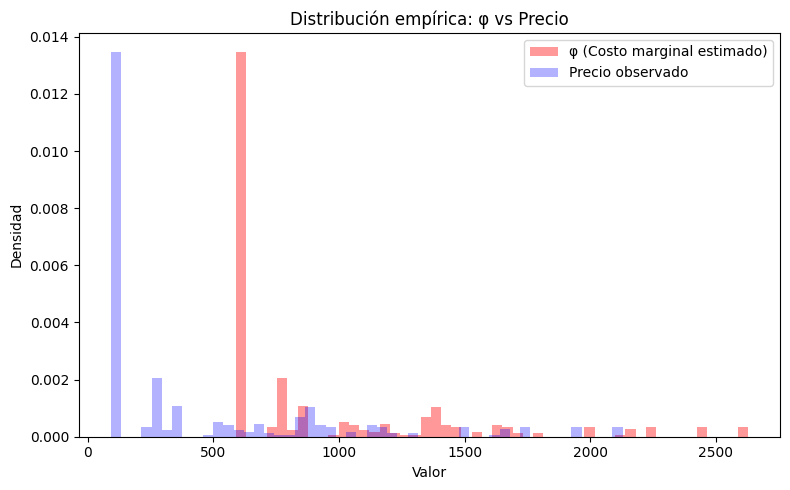

In [105]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

phi = pd.to_numeric(df_result2['phi'], errors='coerce').replace([np.inf, -np.inf], np.nan).dropna()
precio = pd.to_numeric(df_result2['precio_d'], errors='coerce').replace([np.inf, -np.inf], np.nan).dropna()

plt.figure(figsize=(8,5))
plt.hist(phi, bins=50, density=True, color="red", alpha=0.4, label="φ (Costo marginal estimado)")
plt.hist(precio, bins=50, density=True, color="blue", alpha=0.3, label="Precio observado")
plt.xlabel("Valor")
plt.ylabel("Densidad")
plt.title("Distribución empírica: φ vs Precio")
plt.legend()
plt.tight_layout()
plt.show()



## Agregar a nivel hora y graficar bids y valuaciones estimadas

In [112]:
import os

# Crear carpeta principal
output_dir = "results"
os.makedirs(output_dir, exist_ok=True)

# Calcular número de fechas únicas
n_fechas = df_result2["Fecha"].nunique()

# Crear subcarpeta con el número de fechas únicas
sub_dir = os.path.join(output_dir, f"fechas_{n_fechas}")
os.makedirs(sub_dir, exist_ok=True)

print(f"Carpeta creada: {sub_dir}")


Carpeta creada: results\fechas_6


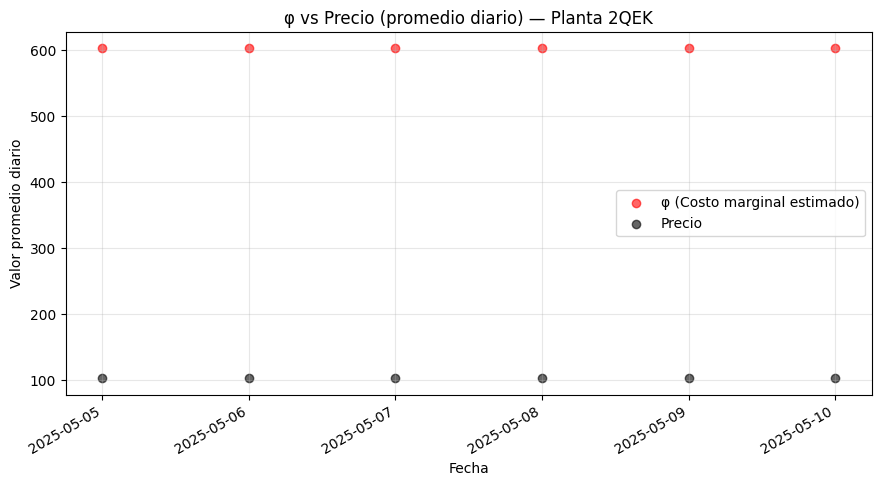

✅ Gráfico guardado: results\phi_precio_2QEK_2025-05-05_to_2025-05-10_M1.png


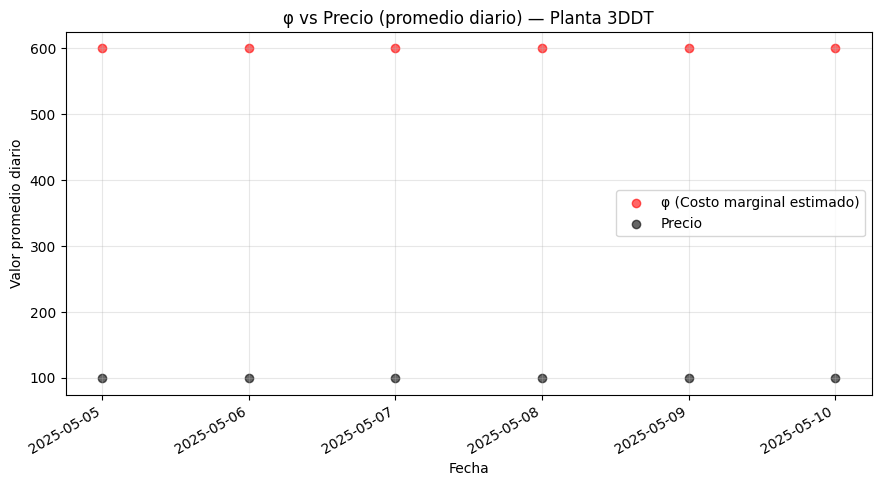

✅ Gráfico guardado: results\phi_precio_3DDT_2025-05-05_to_2025-05-10_M1.png


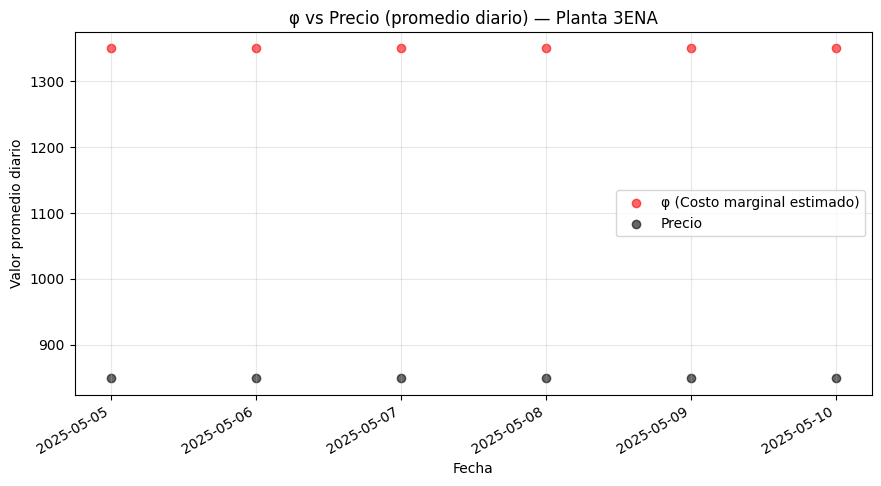

✅ Gráfico guardado: results\phi_precio_3ENA_2025-05-05_to_2025-05-10_M1.png


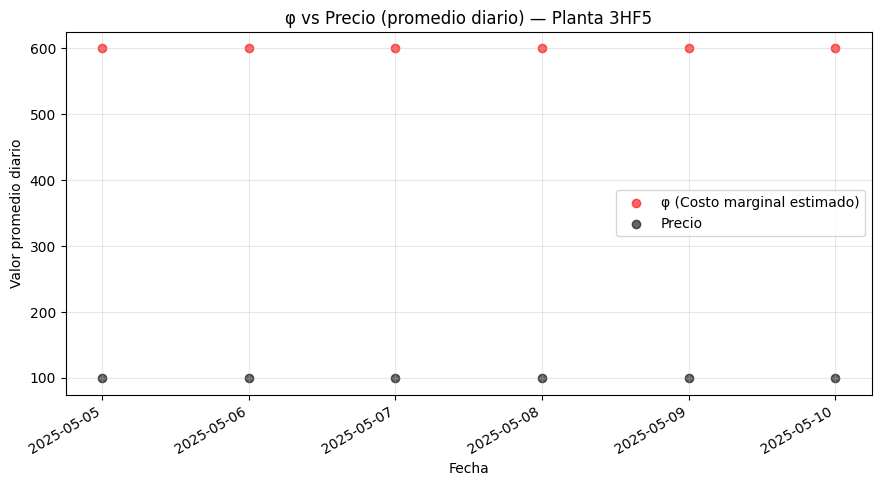

✅ Gráfico guardado: results\phi_precio_3HF5_2025-05-05_to_2025-05-10_M1.png


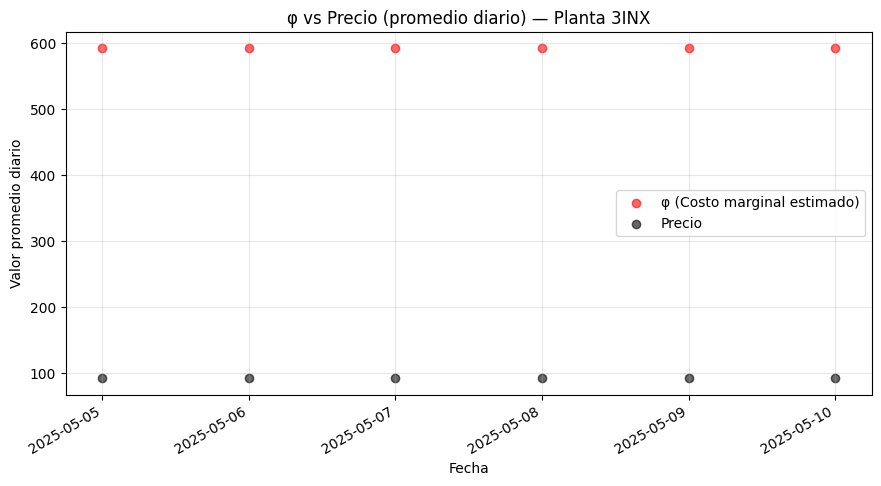

✅ Gráfico guardado: results\phi_precio_3INX_2025-05-05_to_2025-05-10_M1.png


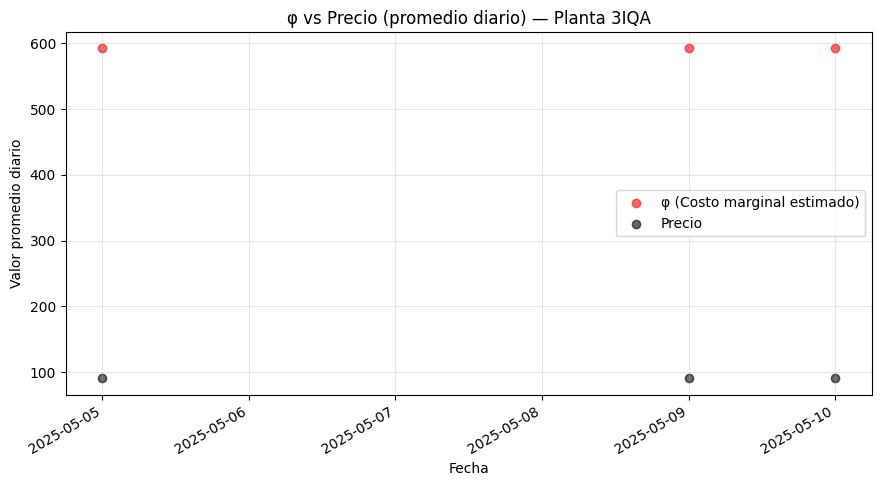

✅ Gráfico guardado: results\phi_precio_3IQA_2025-05-05_to_2025-05-10_M1.png


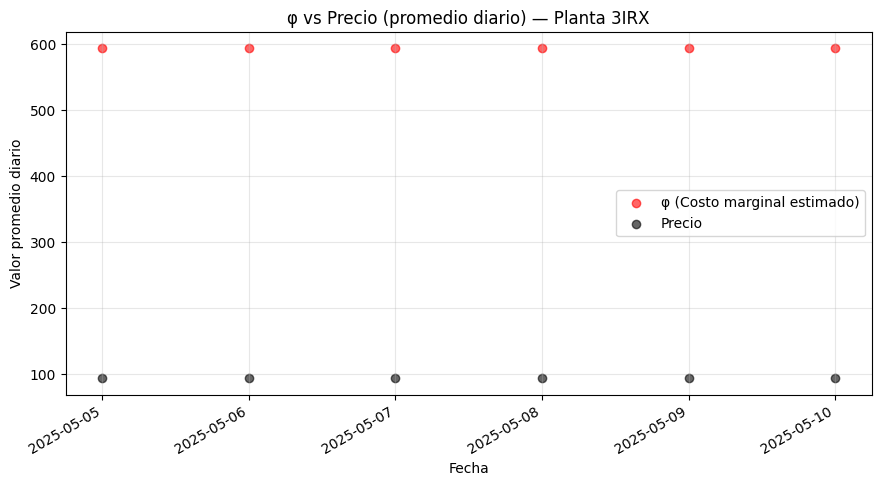

✅ Gráfico guardado: results\phi_precio_3IRX_2025-05-05_to_2025-05-10_M1.png


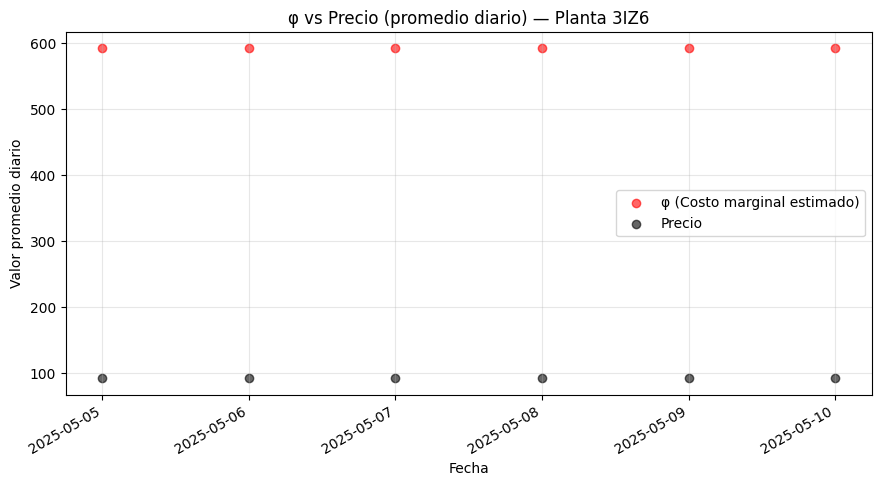

✅ Gráfico guardado: results\phi_precio_3IZ6_2025-05-05_to_2025-05-10_M1.png


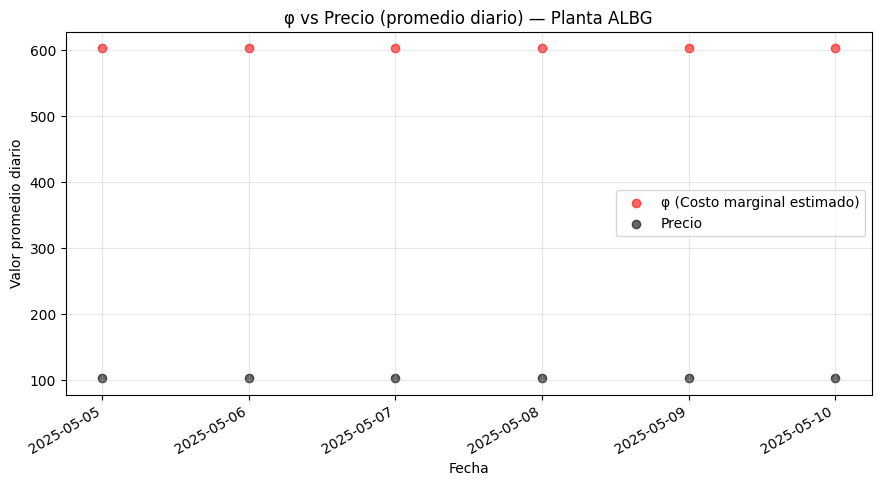

✅ Gráfico guardado: results\phi_precio_ALBG_2025-05-05_to_2025-05-10_M1.png


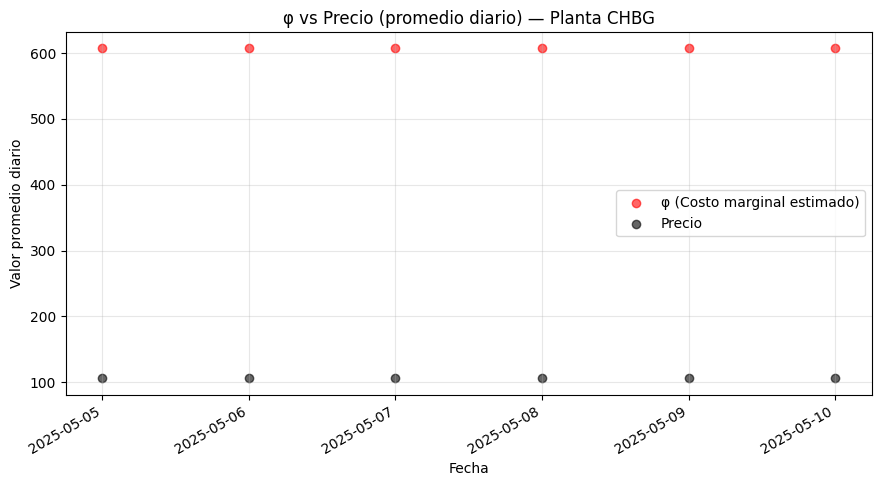

✅ Gráfico guardado: results\phi_precio_CHBG_2025-05-05_to_2025-05-10_M1.png


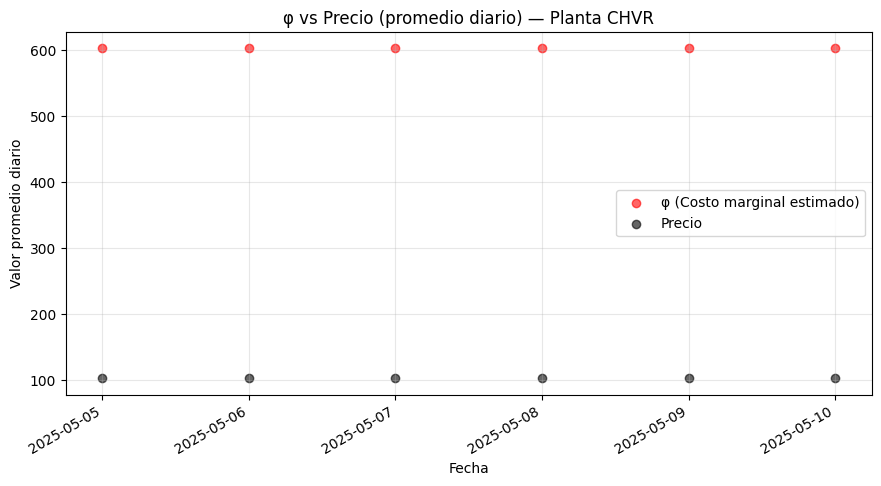

✅ Gráfico guardado: results\phi_precio_CHVR_2025-05-05_to_2025-05-10_M1.png


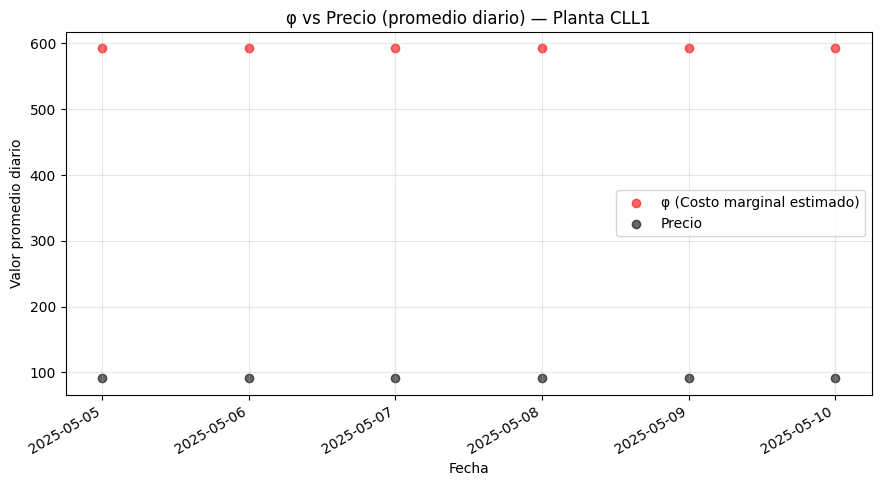

✅ Gráfico guardado: results\phi_precio_CLL1_2025-05-05_to_2025-05-10_M1.png


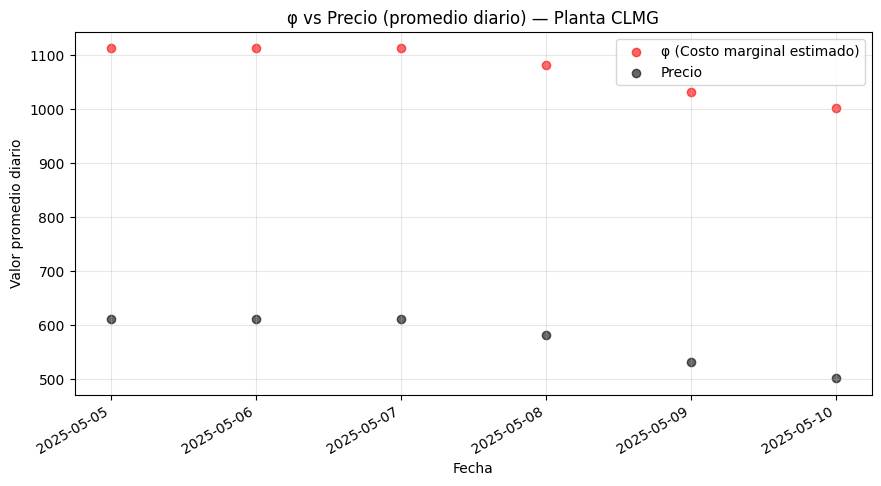

✅ Gráfico guardado: results\phi_precio_CLMG_2025-05-05_to_2025-05-10_M1.png


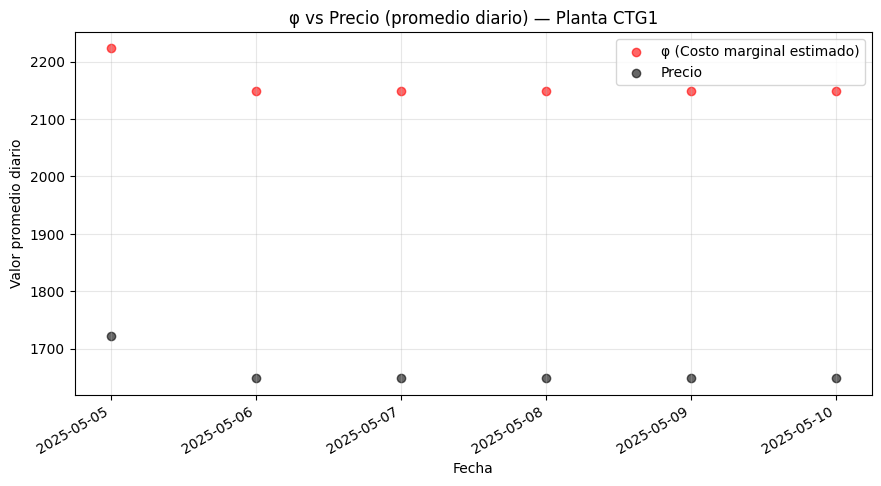

✅ Gráfico guardado: results\phi_precio_CTG1_2025-05-05_to_2025-05-10_M1.png


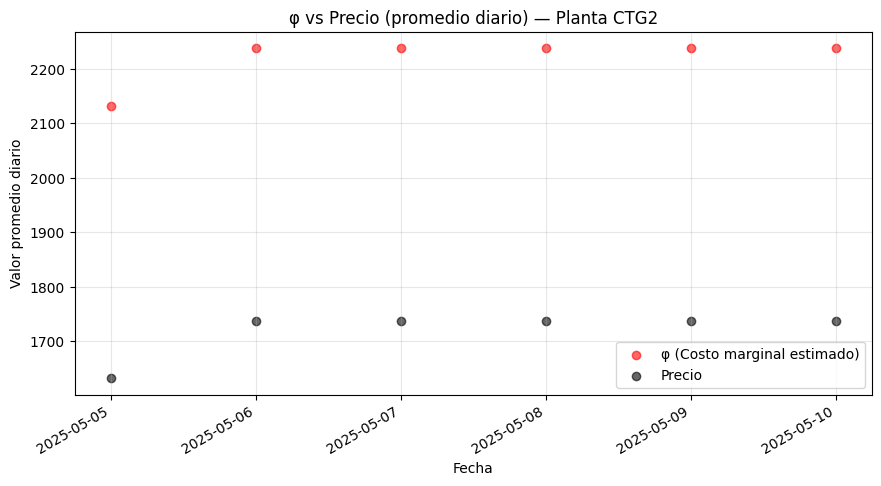

✅ Gráfico guardado: results\phi_precio_CTG2_2025-05-05_to_2025-05-10_M1.png


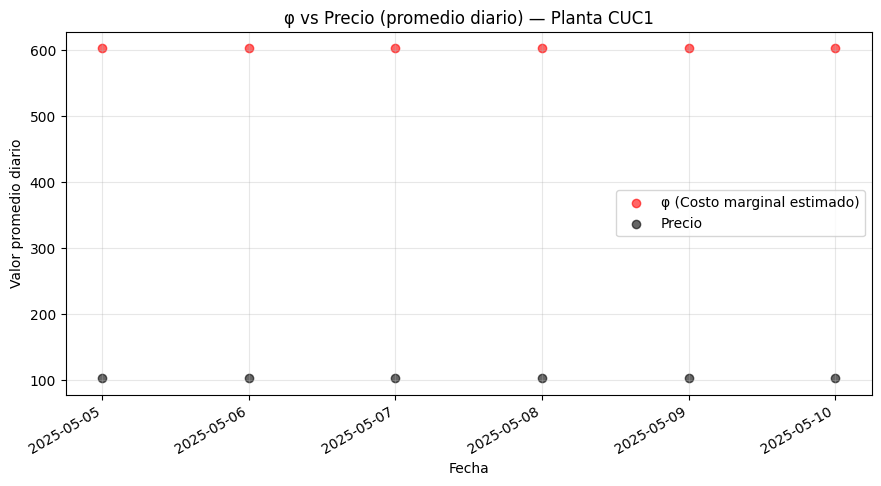

✅ Gráfico guardado: results\phi_precio_CUC1_2025-05-05_to_2025-05-10_M1.png


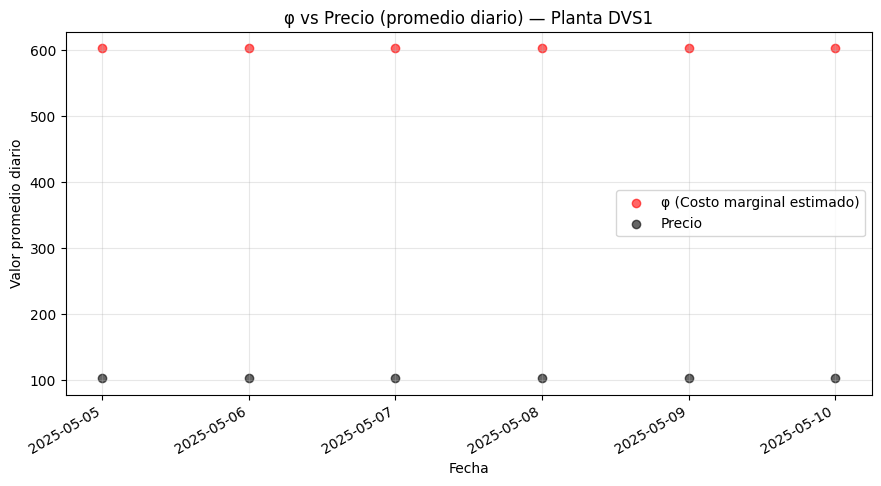

✅ Gráfico guardado: results\phi_precio_DVS1_2025-05-05_to_2025-05-10_M1.png


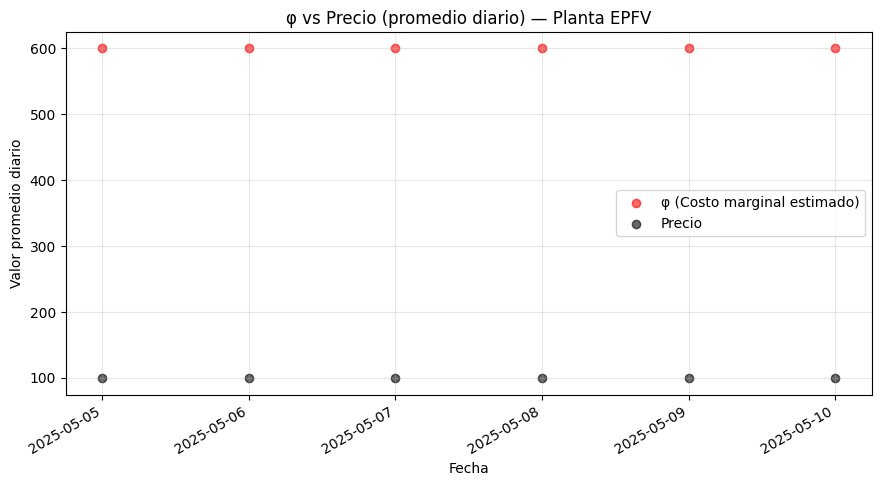

✅ Gráfico guardado: results\phi_precio_EPFV_2025-05-05_to_2025-05-10_M1.png


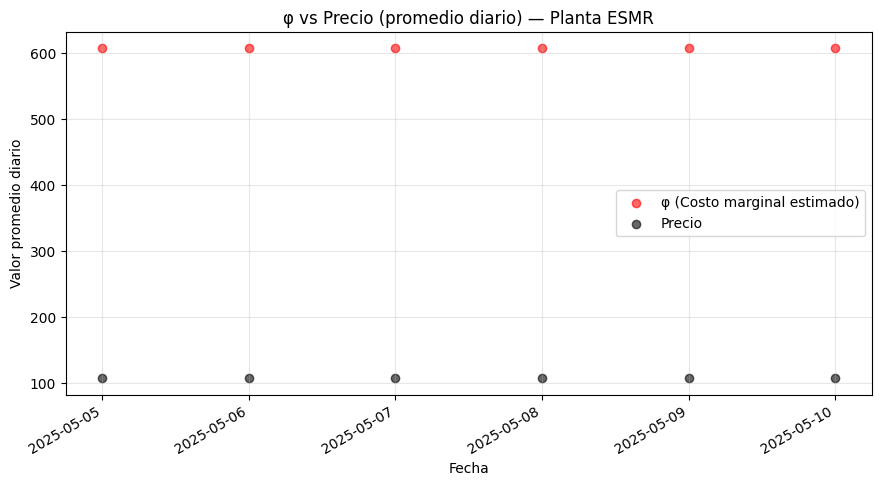

✅ Gráfico guardado: results\phi_precio_ESMR_2025-05-05_to_2025-05-10_M1.png


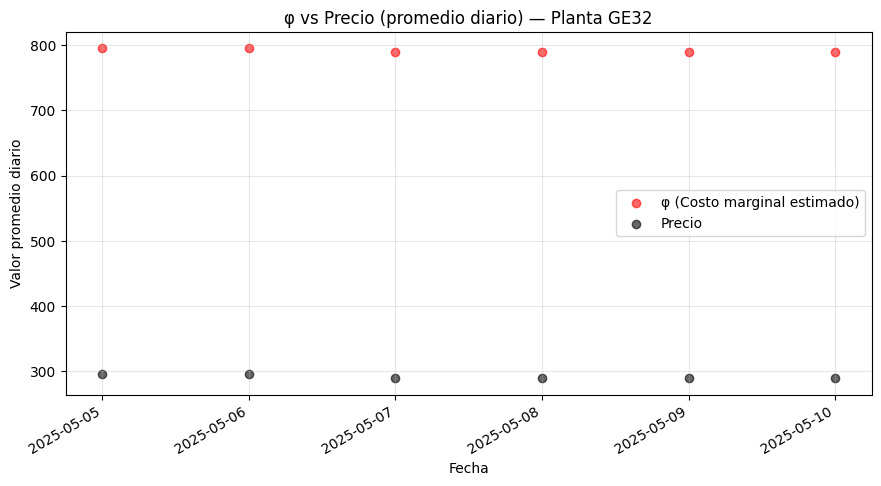

✅ Gráfico guardado: results\phi_precio_GE32_2025-05-05_to_2025-05-10_M1.png


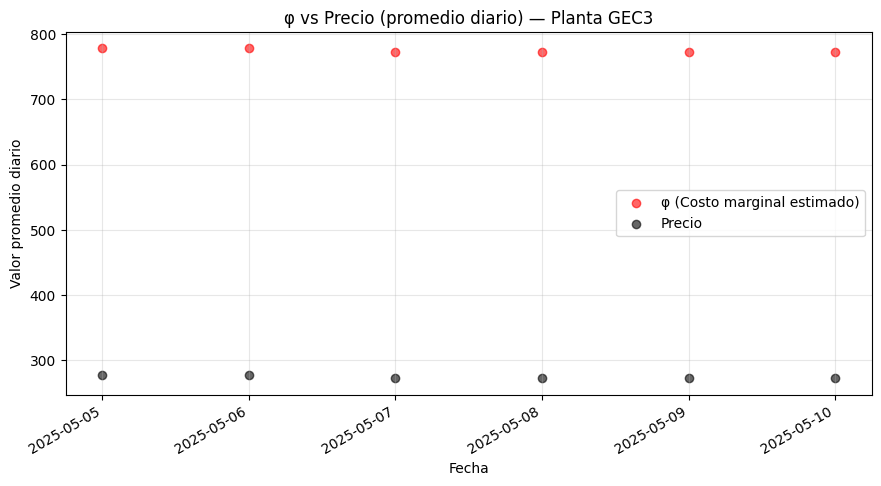

✅ Gráfico guardado: results\phi_precio_GEC3_2025-05-05_to_2025-05-10_M1.png


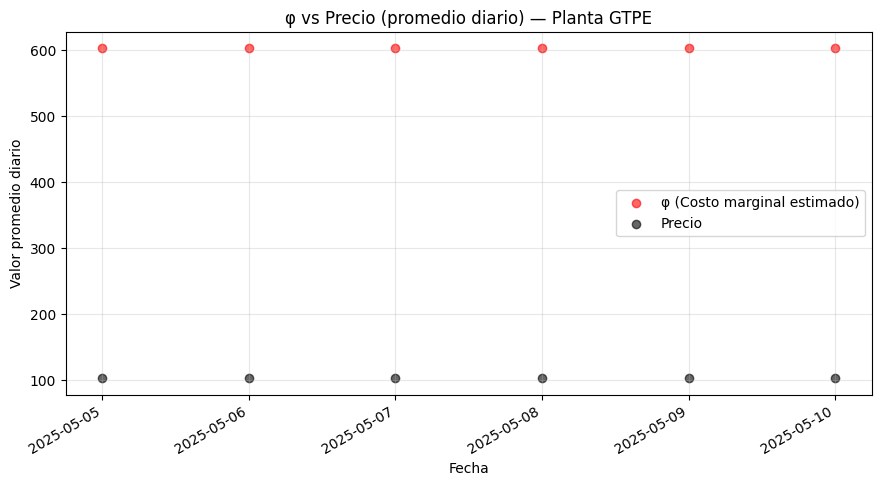

✅ Gráfico guardado: results\phi_precio_GTPE_2025-05-05_to_2025-05-10_M1.png


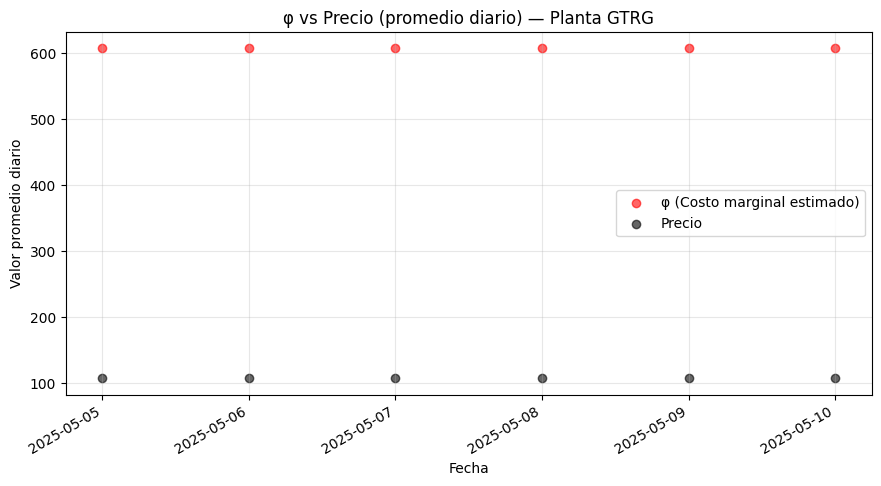

✅ Gráfico guardado: results\phi_precio_GTRG_2025-05-05_to_2025-05-10_M1.png


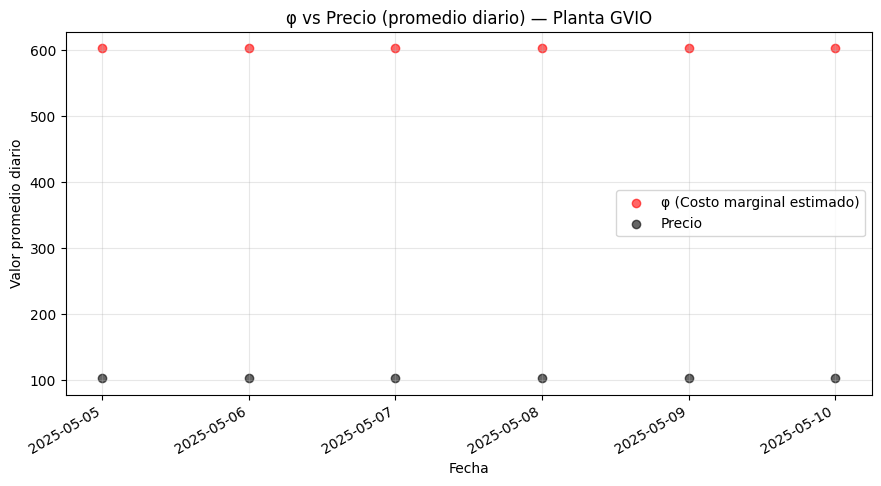

✅ Gráfico guardado: results\phi_precio_GVIO_2025-05-05_to_2025-05-10_M1.png


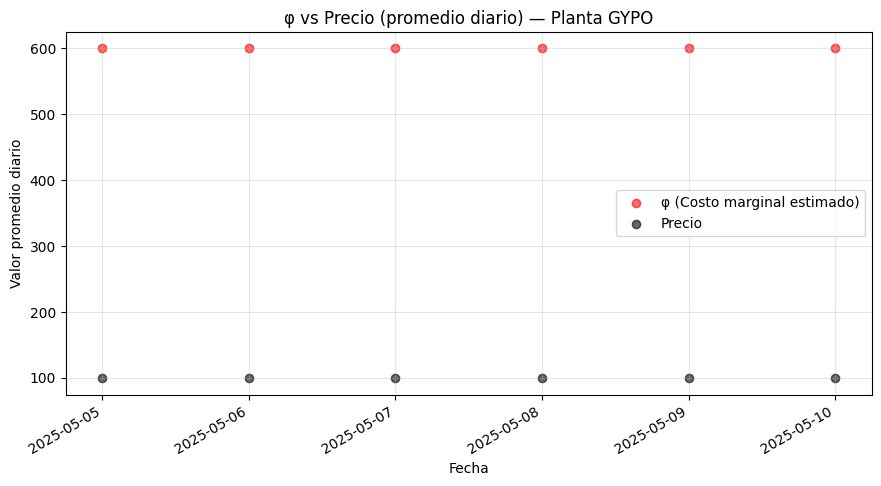

✅ Gráfico guardado: results\phi_precio_GYPO_2025-05-05_to_2025-05-10_M1.png


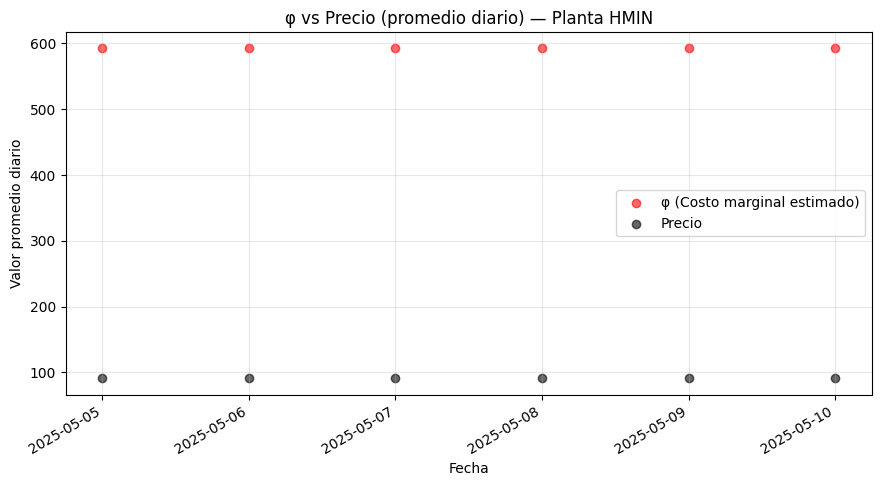

✅ Gráfico guardado: results\phi_precio_HMIN_2025-05-05_to_2025-05-10_M1.png


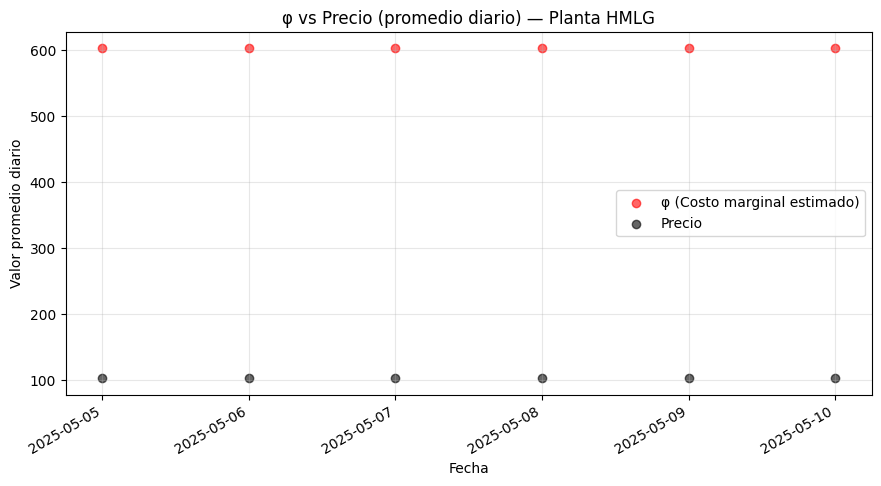

✅ Gráfico guardado: results\phi_precio_HMLG_2025-05-05_to_2025-05-10_M1.png


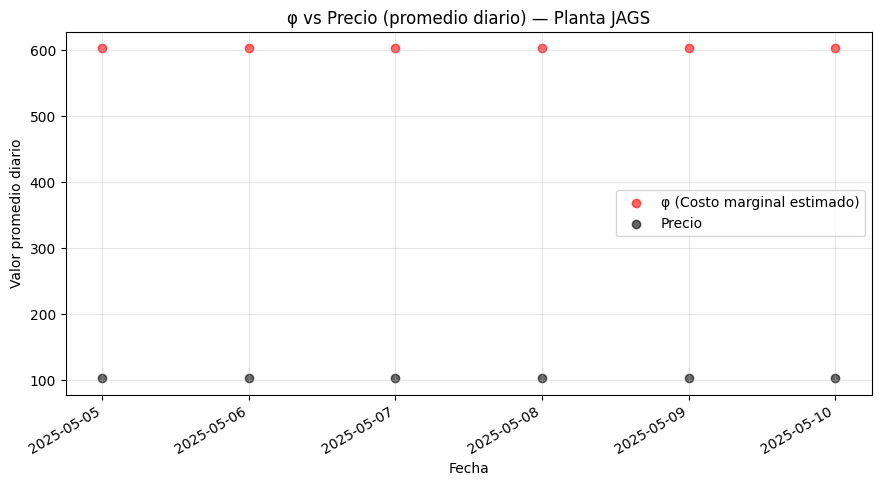

✅ Gráfico guardado: results\phi_precio_JAGS_2025-05-05_to_2025-05-10_M1.png


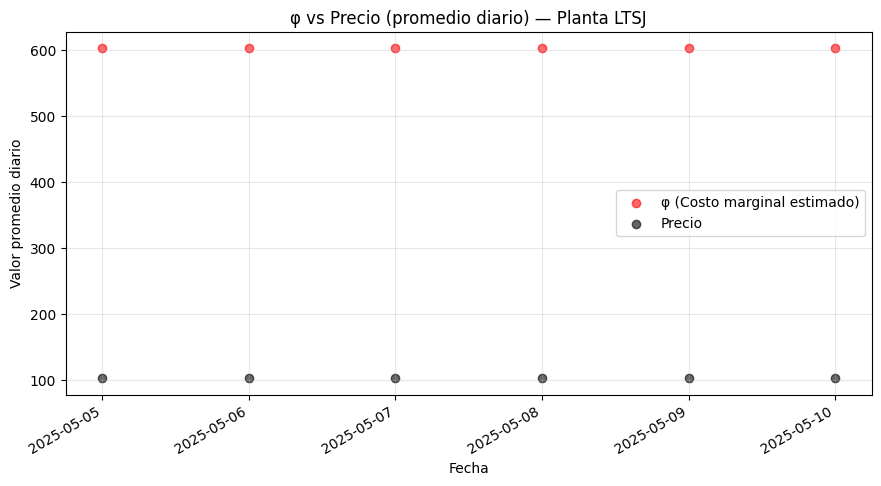

✅ Gráfico guardado: results\phi_precio_LTSJ_2025-05-05_to_2025-05-10_M1.png


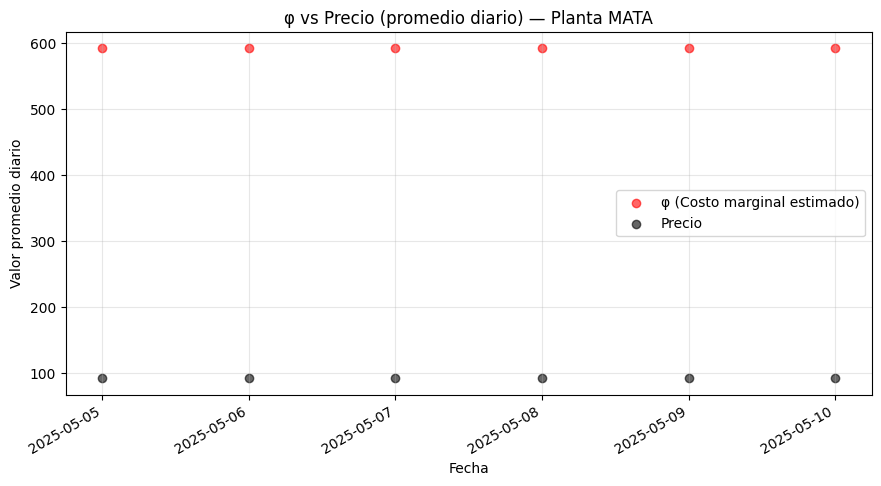

✅ Gráfico guardado: results\phi_precio_MATA_2025-05-05_to_2025-05-10_M1.png


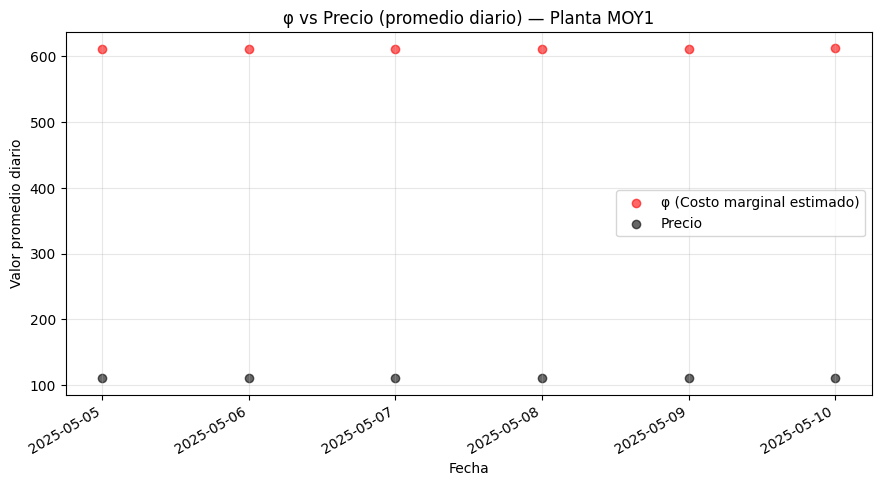

✅ Gráfico guardado: results\phi_precio_MOY1_2025-05-05_to_2025-05-10_M1.png


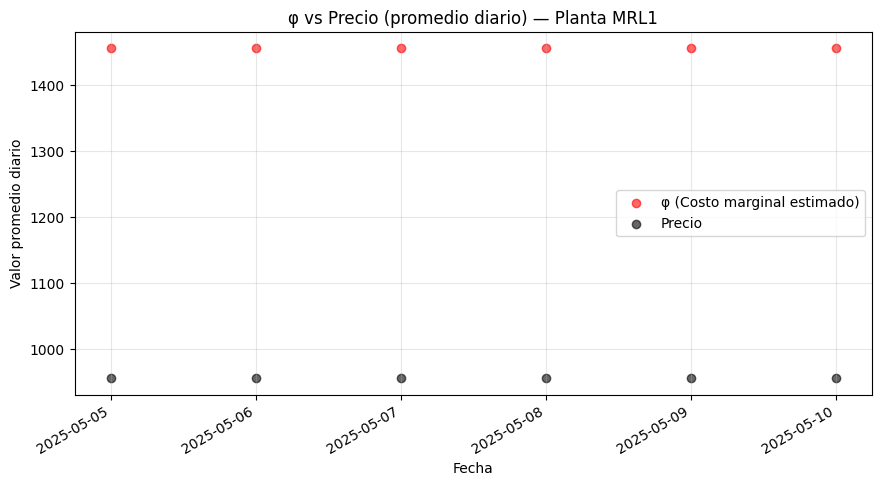

✅ Gráfico guardado: results\phi_precio_MRL1_2025-05-05_to_2025-05-10_M1.png


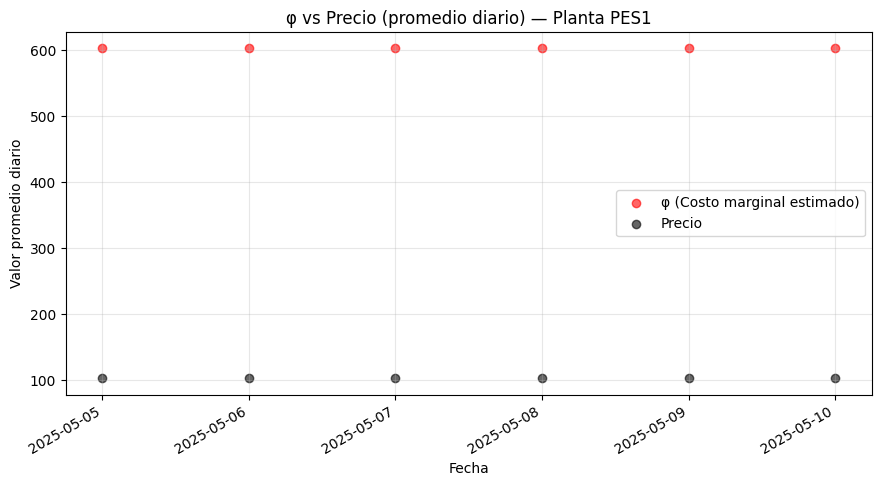

✅ Gráfico guardado: results\phi_precio_PES1_2025-05-05_to_2025-05-10_M1.png


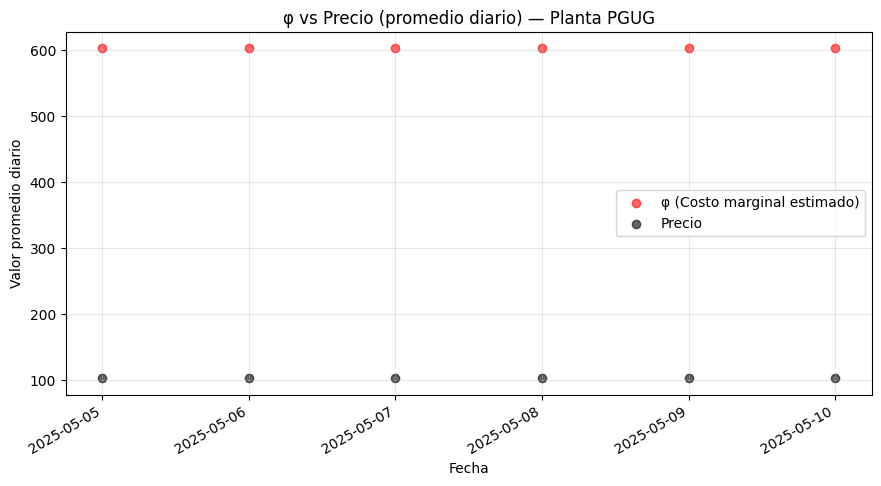

✅ Gráfico guardado: results\phi_precio_PGUG_2025-05-05_to_2025-05-10_M1.png


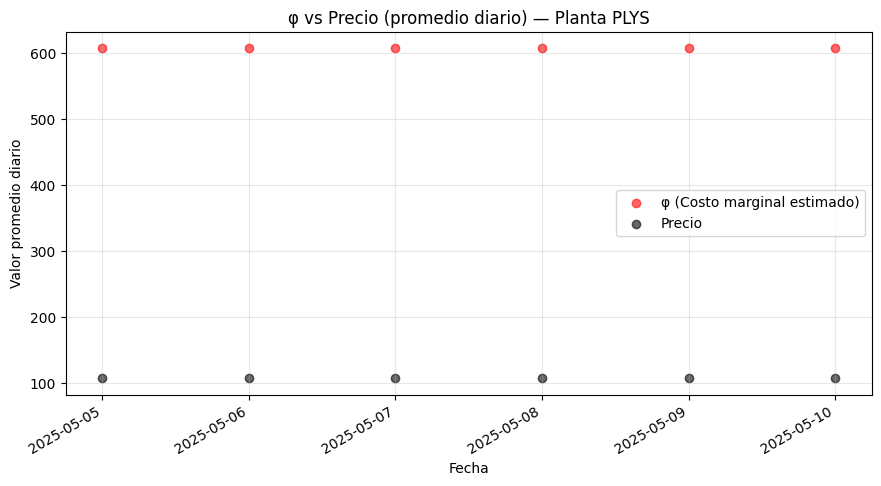

✅ Gráfico guardado: results\phi_precio_PLYS_2025-05-05_to_2025-05-10_M1.png


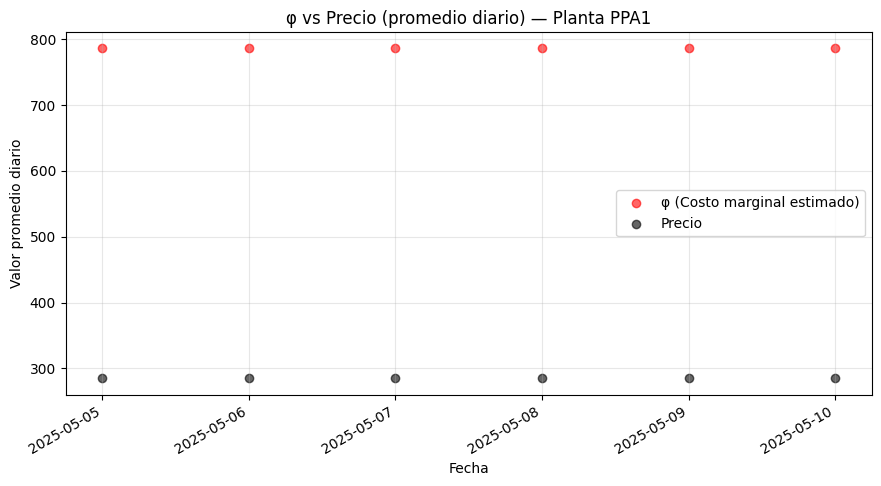

✅ Gráfico guardado: results\phi_precio_PPA1_2025-05-05_to_2025-05-10_M1.png


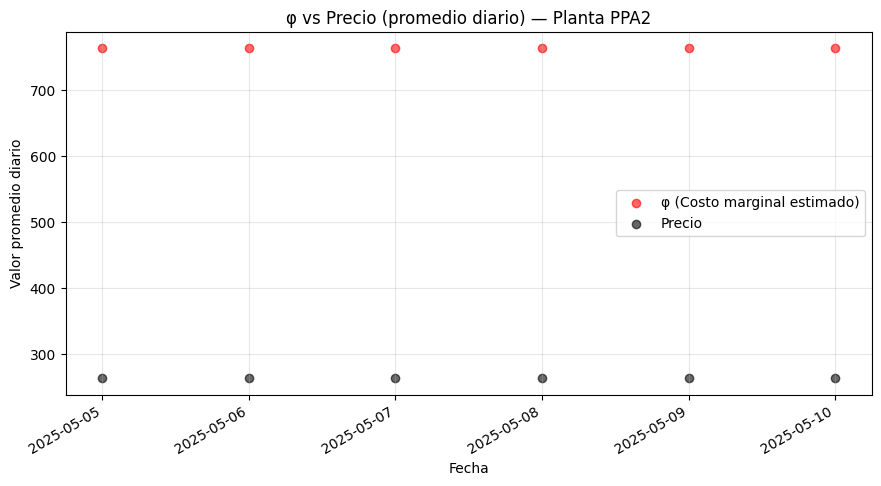

✅ Gráfico guardado: results\phi_precio_PPA2_2025-05-05_to_2025-05-10_M1.png


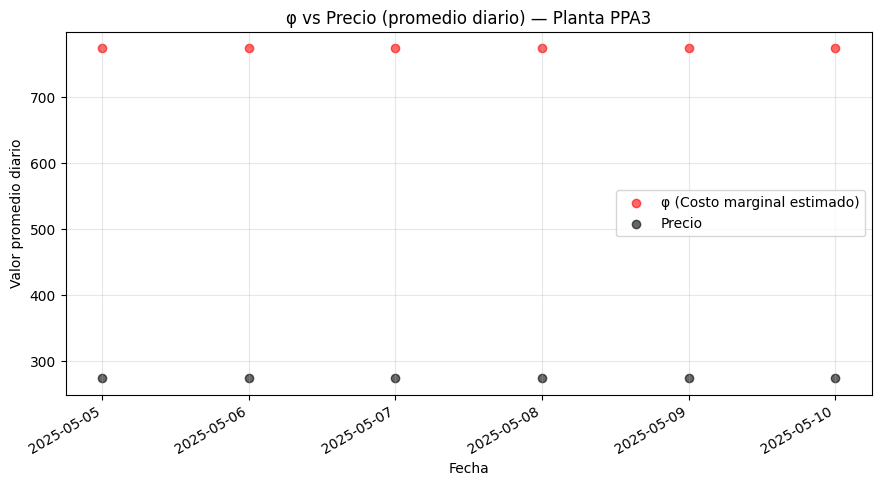

✅ Gráfico guardado: results\phi_precio_PPA3_2025-05-05_to_2025-05-10_M1.png


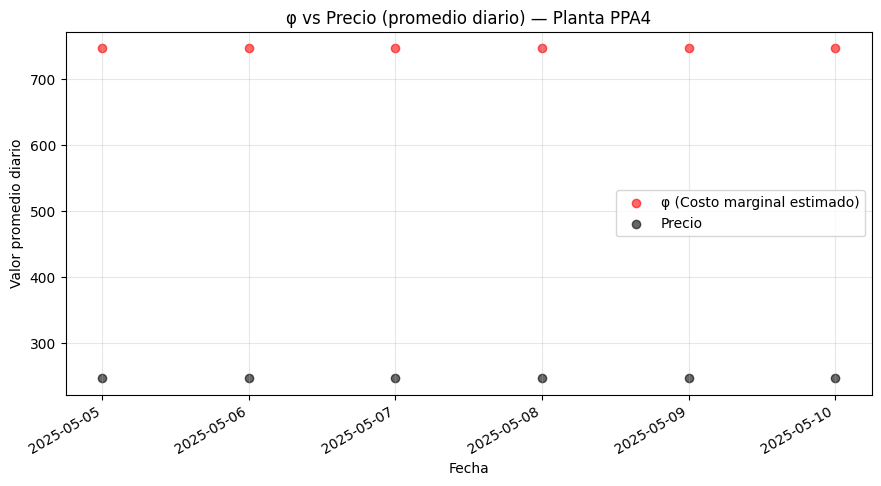

✅ Gráfico guardado: results\phi_precio_PPA4_2025-05-05_to_2025-05-10_M1.png


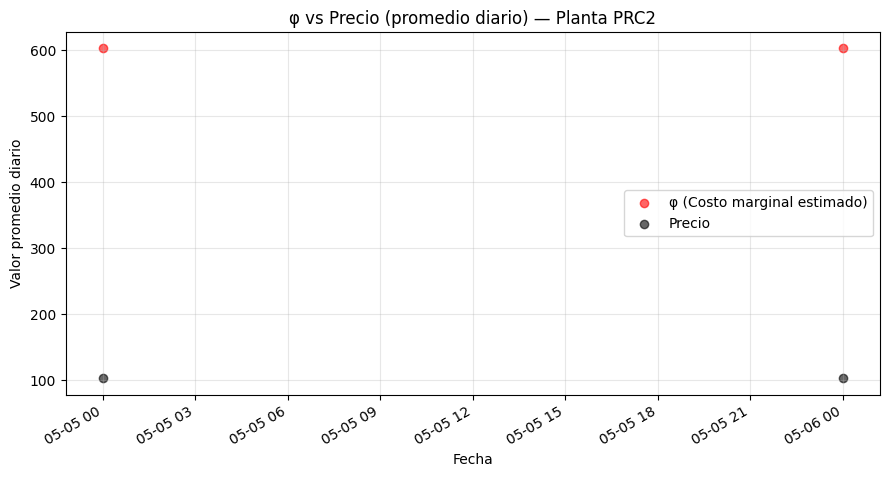

✅ Gráfico guardado: results\phi_precio_PRC2_2025-05-05_to_2025-05-06_M1.png


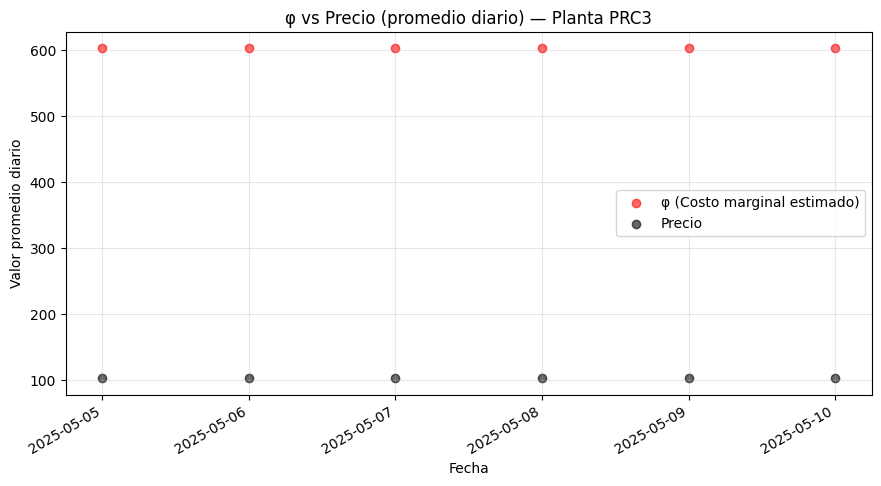

✅ Gráfico guardado: results\phi_precio_PRC3_2025-05-05_to_2025-05-10_M1.png


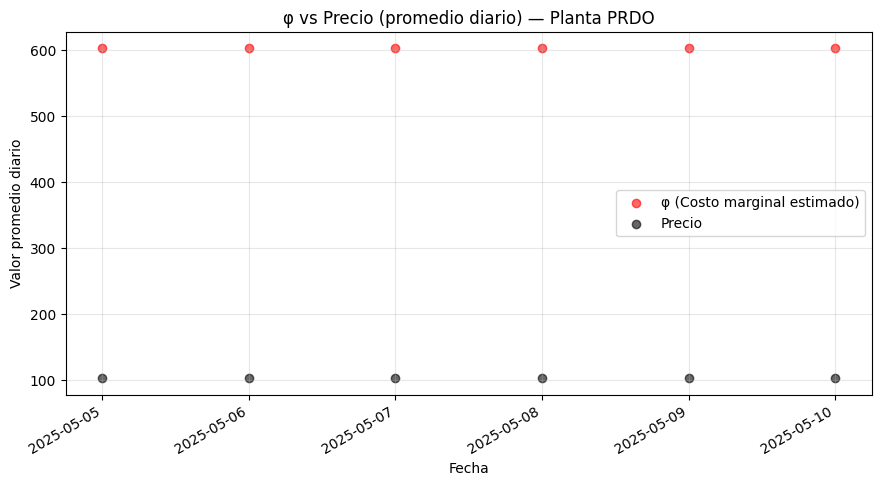

✅ Gráfico guardado: results\phi_precio_PRDO_2025-05-05_to_2025-05-10_M1.png


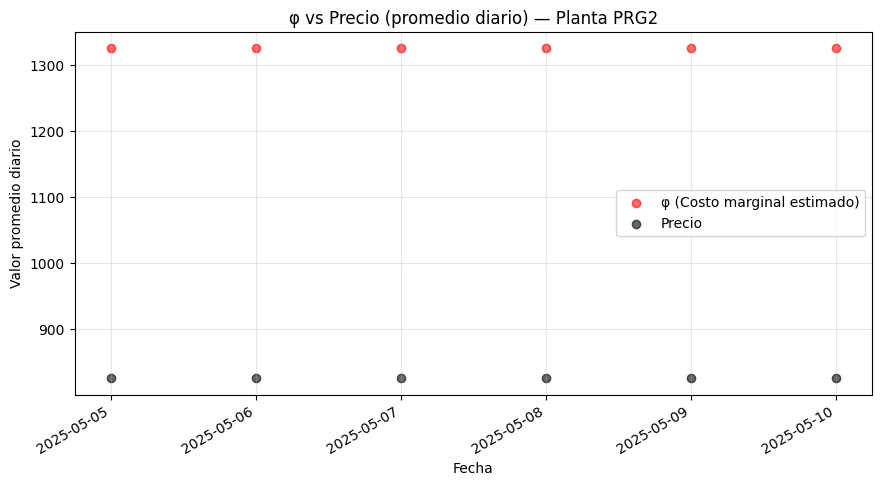

✅ Gráfico guardado: results\phi_precio_PRG2_2025-05-05_to_2025-05-10_M1.png


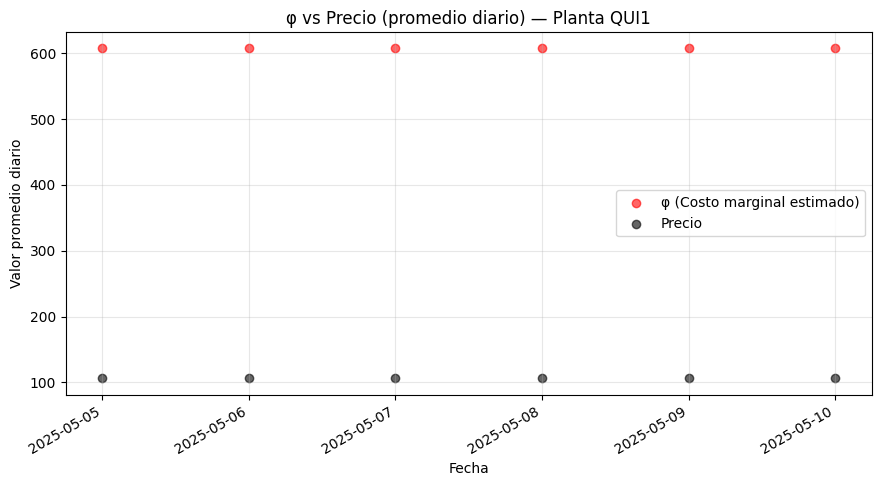

✅ Gráfico guardado: results\phi_precio_QUI1_2025-05-05_to_2025-05-10_M1.png


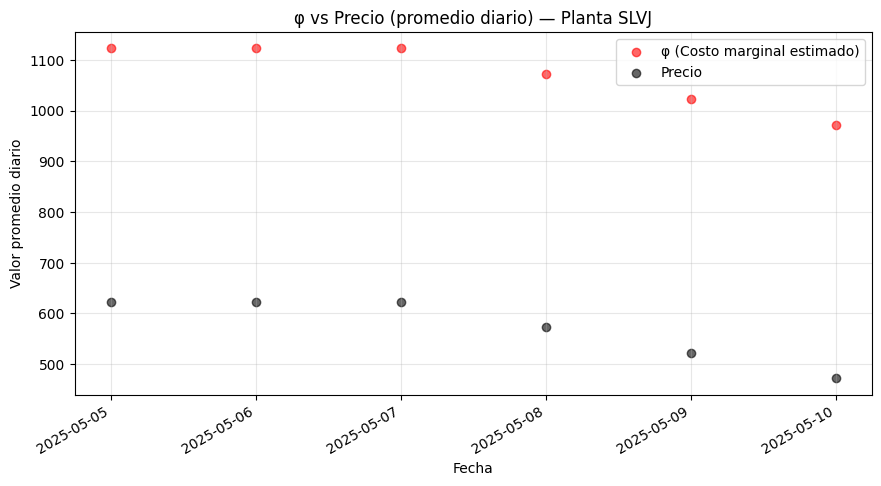

✅ Gráfico guardado: results\phi_precio_SLVJ_2025-05-05_to_2025-05-10_M1.png


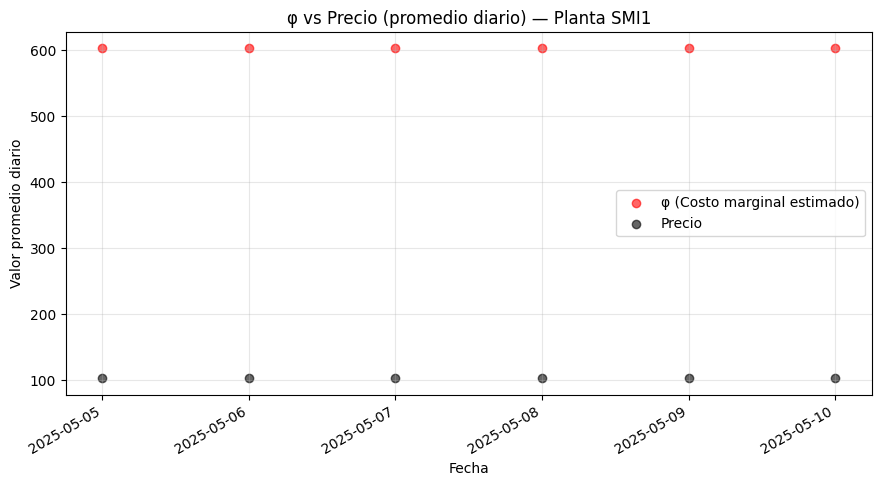

✅ Gráfico guardado: results\phi_precio_SMI1_2025-05-05_to_2025-05-10_M1.png


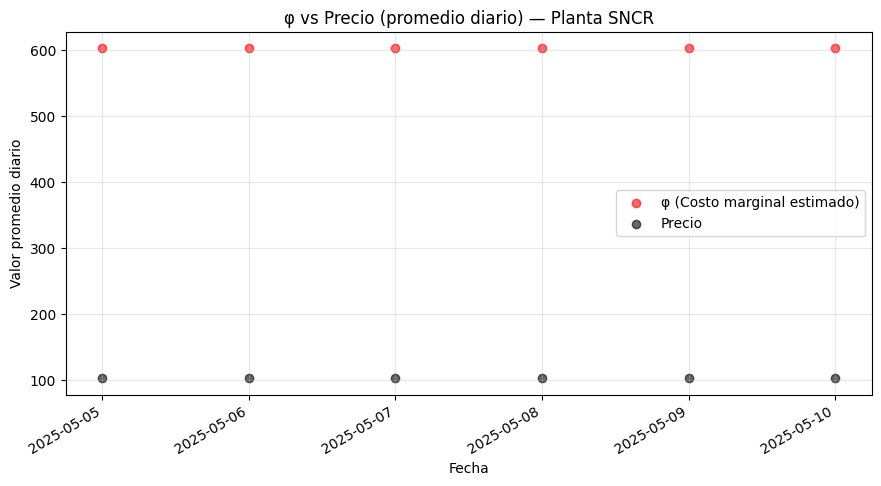

✅ Gráfico guardado: results\phi_precio_SNCR_2025-05-05_to_2025-05-10_M1.png


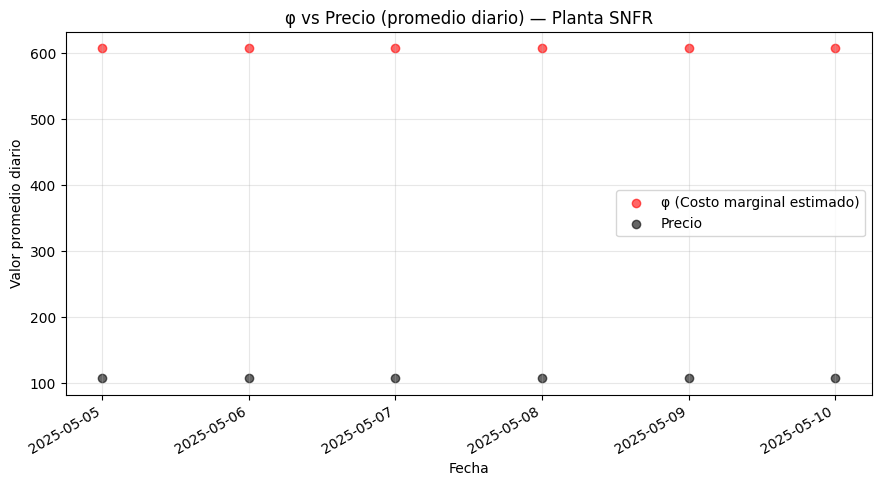

✅ Gráfico guardado: results\phi_precio_SNFR_2025-05-05_to_2025-05-10_M1.png


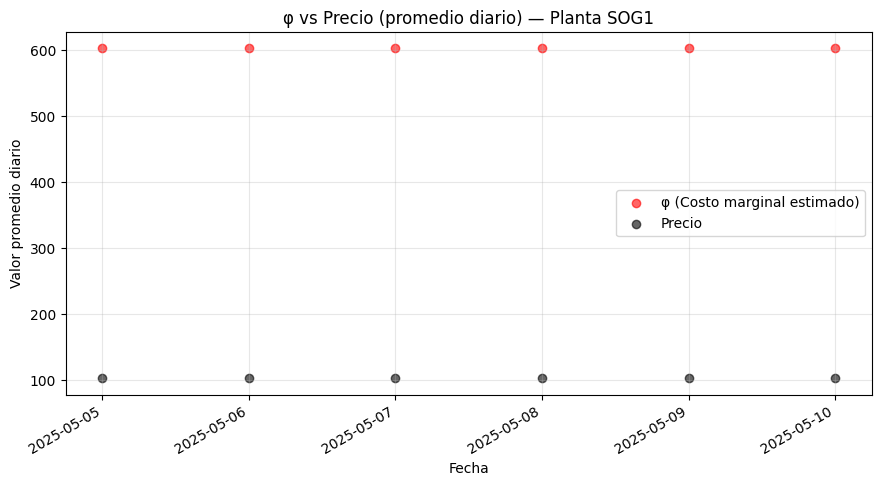

✅ Gráfico guardado: results\phi_precio_SOG1_2025-05-05_to_2025-05-10_M1.png


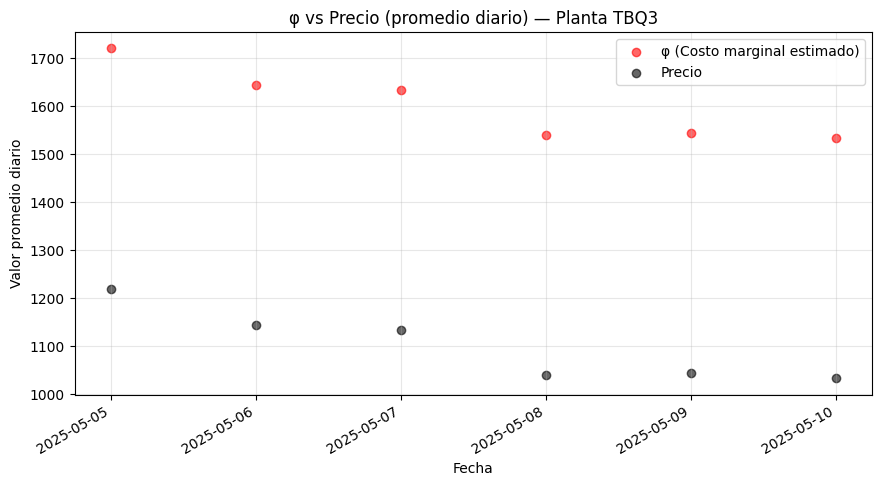

✅ Gráfico guardado: results\phi_precio_TBQ3_2025-05-05_to_2025-05-10_M1.png


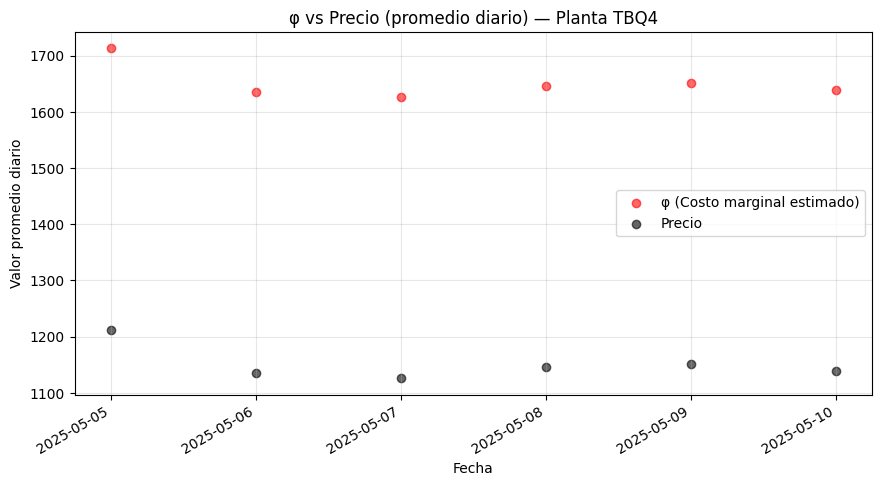

✅ Gráfico guardado: results\phi_precio_TBQ4_2025-05-05_to_2025-05-10_M1.png


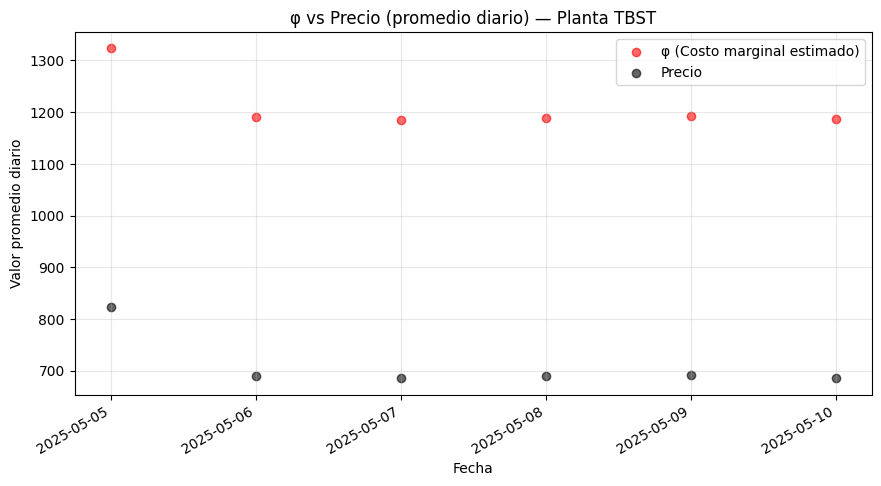

✅ Gráfico guardado: results\phi_precio_TBST_2025-05-05_to_2025-05-10_M1.png


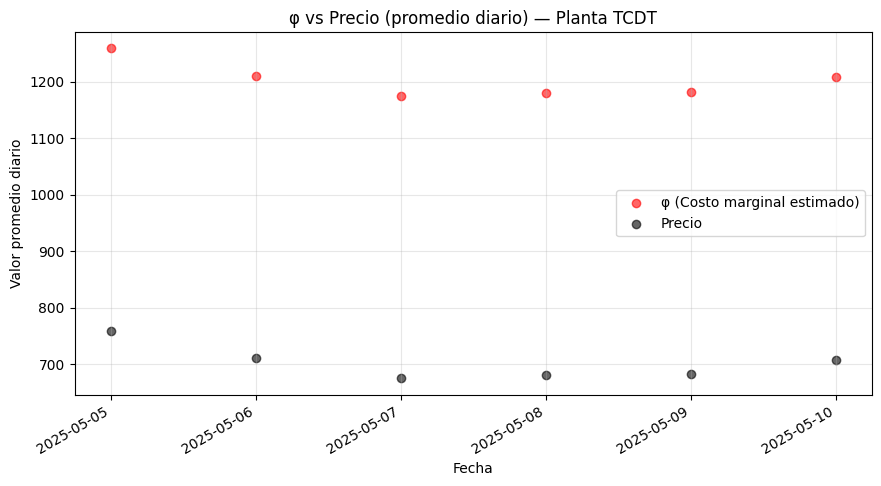

✅ Gráfico guardado: results\phi_precio_TCDT_2025-05-05_to_2025-05-10_M1.png


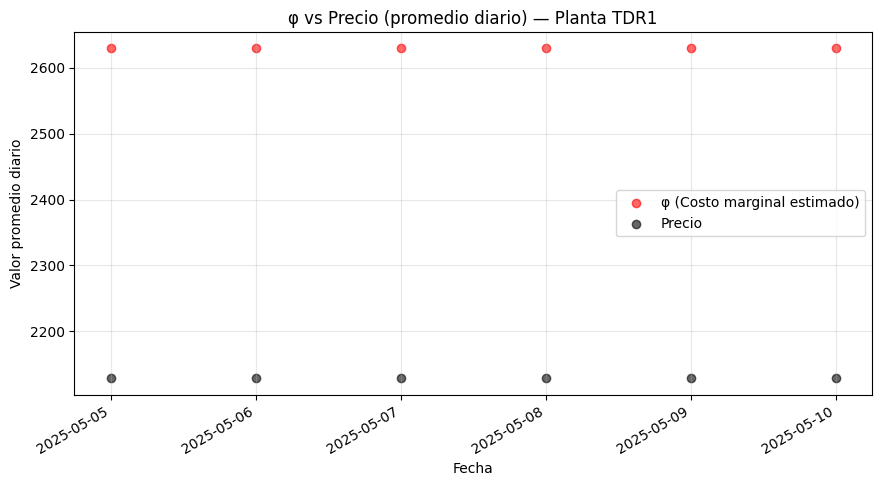

✅ Gráfico guardado: results\phi_precio_TDR1_2025-05-05_to_2025-05-10_M1.png


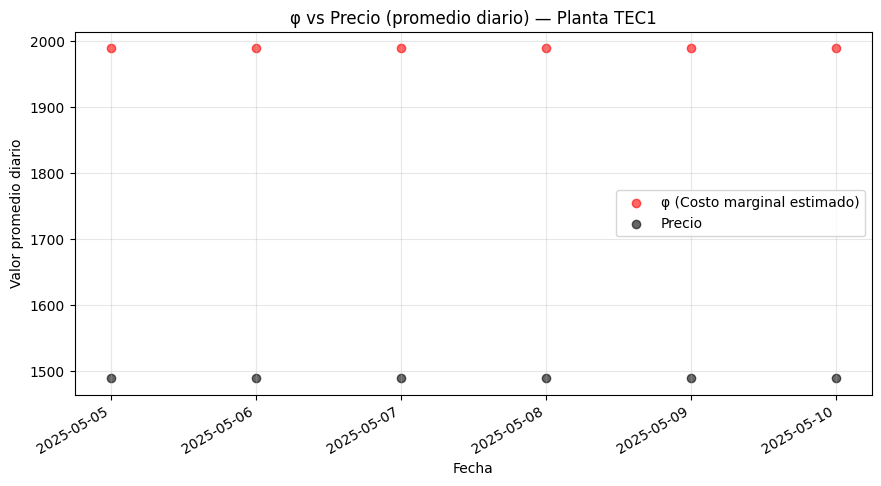

✅ Gráfico guardado: results\phi_precio_TEC1_2025-05-05_to_2025-05-10_M1.png


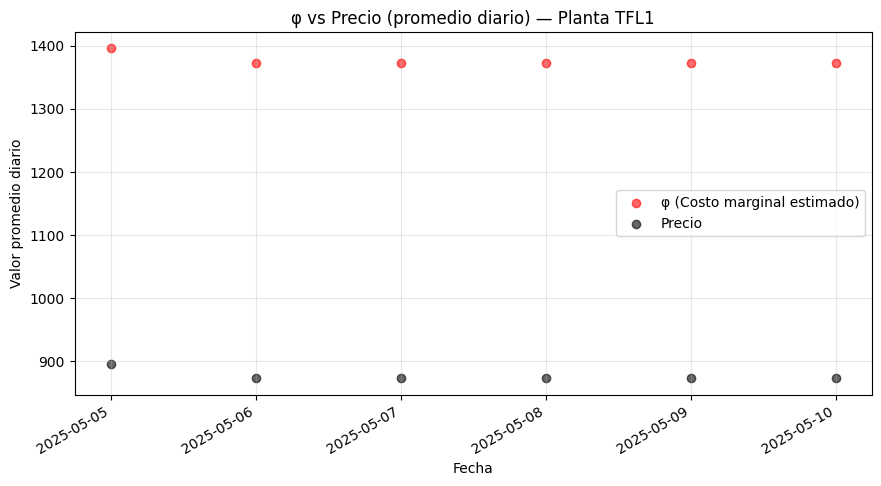

✅ Gráfico guardado: results\phi_precio_TFL1_2025-05-05_to_2025-05-10_M1.png


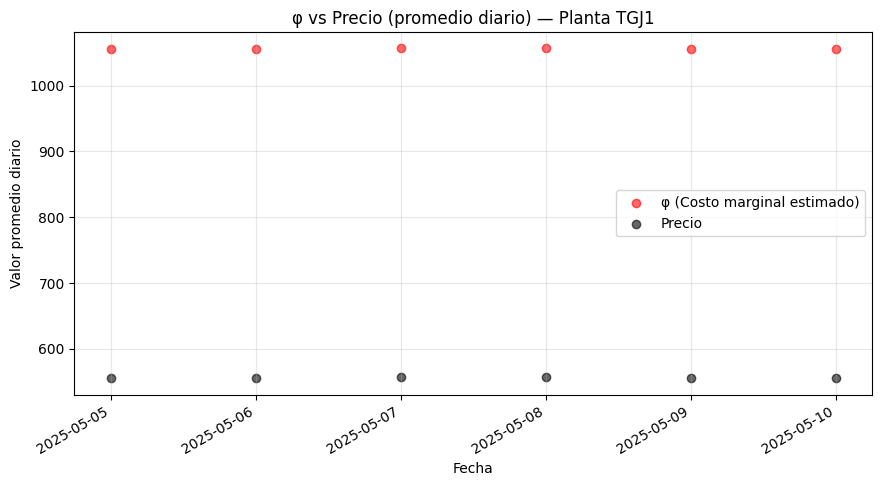

✅ Gráfico guardado: results\phi_precio_TGJ1_2025-05-05_to_2025-05-10_M1.png


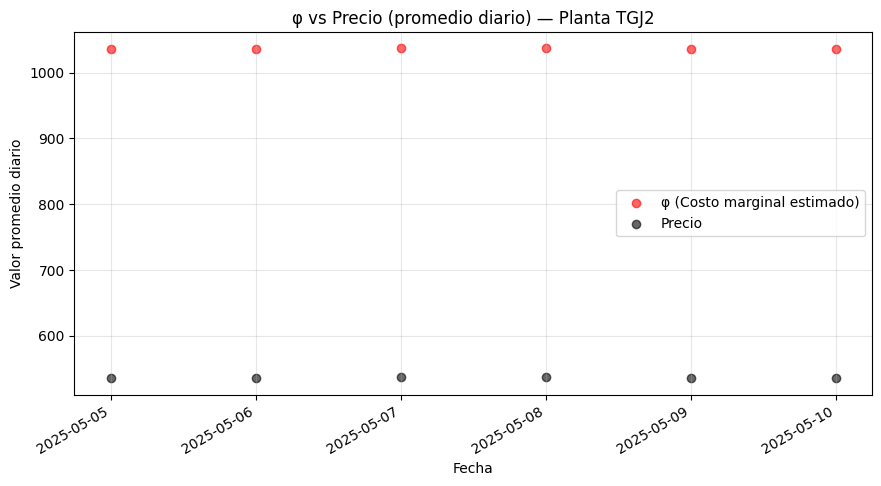

✅ Gráfico guardado: results\phi_precio_TGJ2_2025-05-05_to_2025-05-10_M1.png


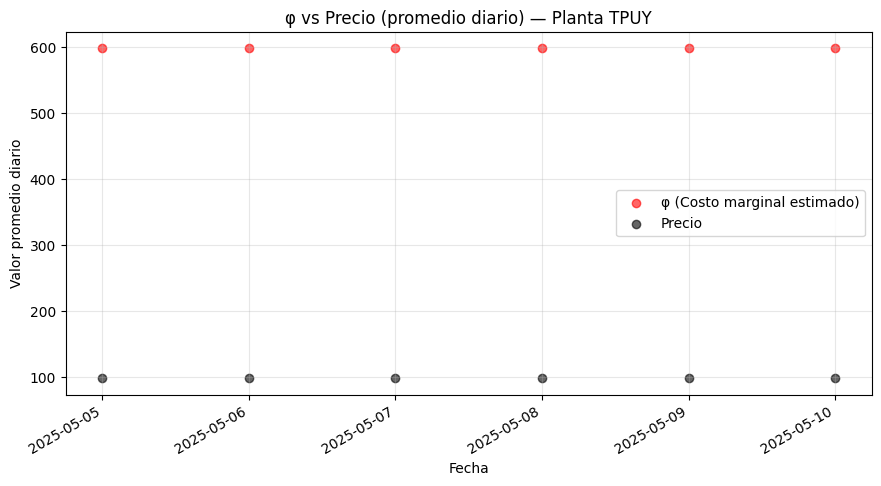

✅ Gráfico guardado: results\phi_precio_TPUY_2025-05-05_to_2025-05-10_M1.png


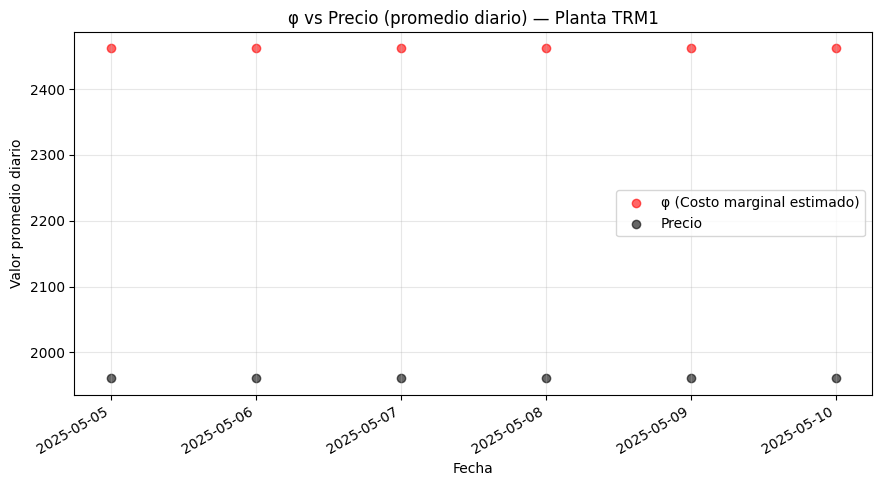

✅ Gráfico guardado: results\phi_precio_TRM1_2025-05-05_to_2025-05-10_M1.png


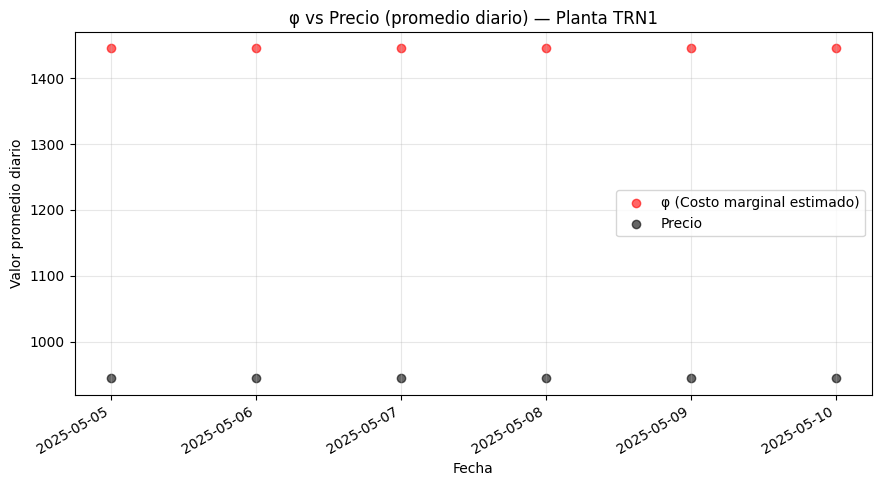

✅ Gráfico guardado: results\phi_precio_TRN1_2025-05-05_to_2025-05-10_M1.png


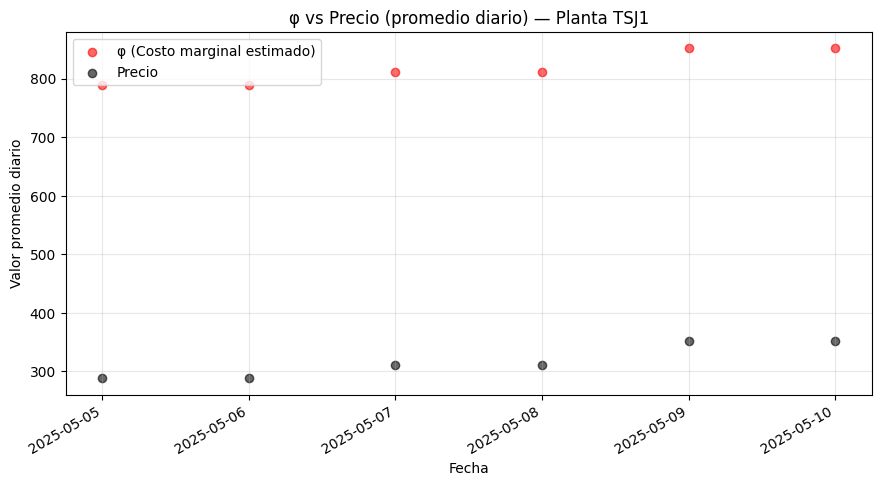

✅ Gráfico guardado: results\phi_precio_TSJ1_2025-05-05_to_2025-05-10_M1.png


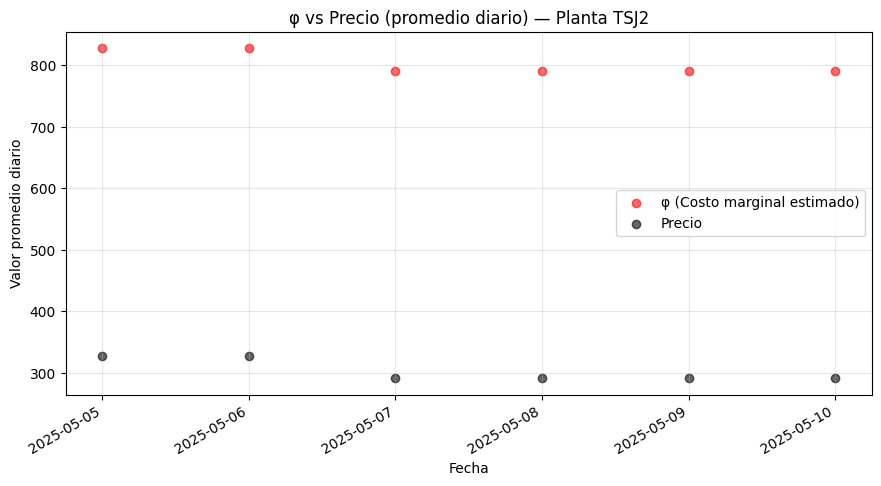

✅ Gráfico guardado: results\phi_precio_TSJ2_2025-05-05_to_2025-05-10_M1.png


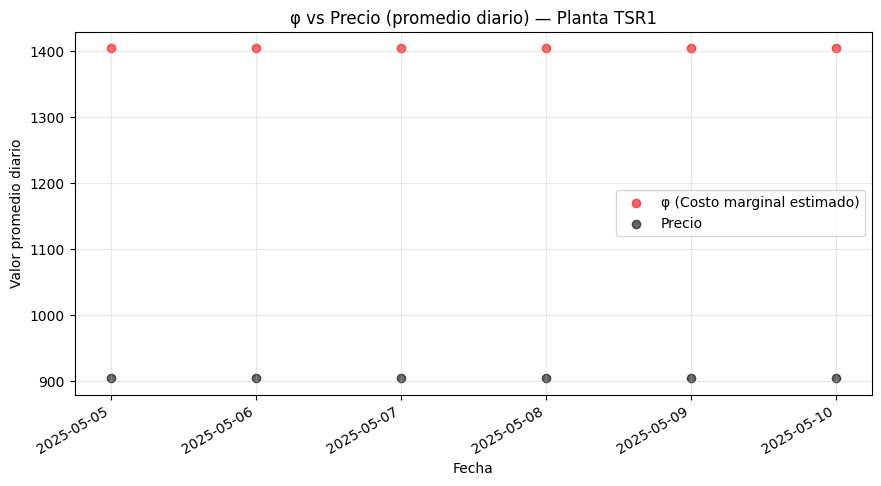

✅ Gráfico guardado: results\phi_precio_TSR1_2025-05-05_to_2025-05-10_M1.png


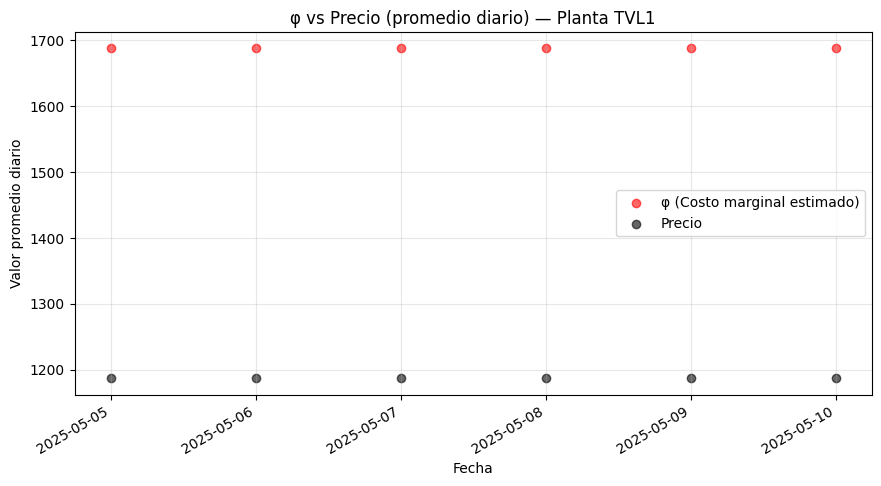

✅ Gráfico guardado: results\phi_precio_TVL1_2025-05-05_to_2025-05-10_M1.png


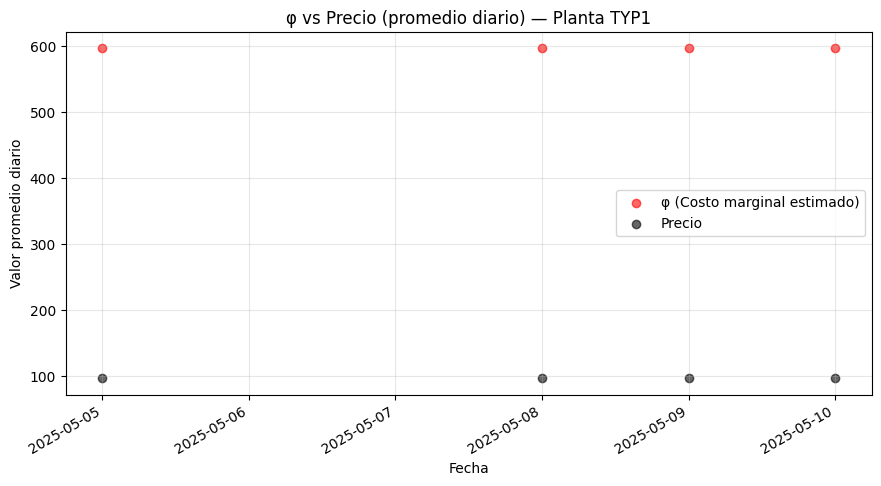

✅ Gráfico guardado: results\phi_precio_TYP1_2025-05-05_to_2025-05-10_M1.png


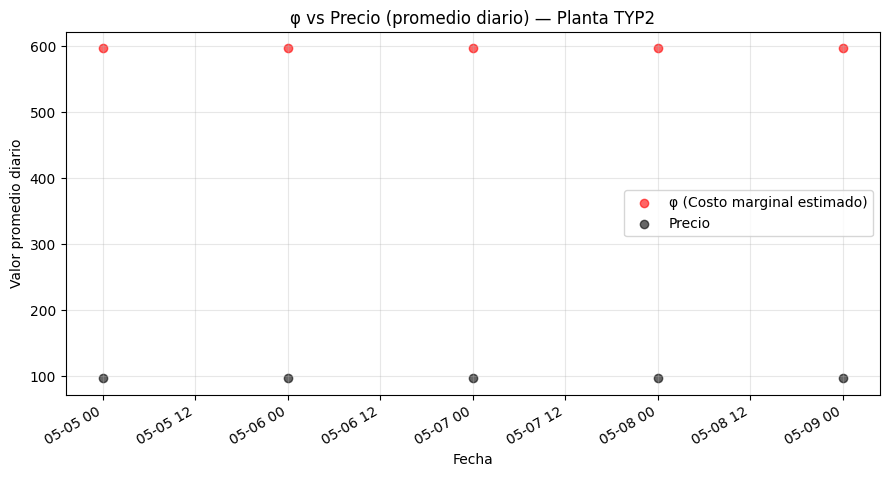

✅ Gráfico guardado: results\phi_precio_TYP2_2025-05-05_to_2025-05-09_M1.png


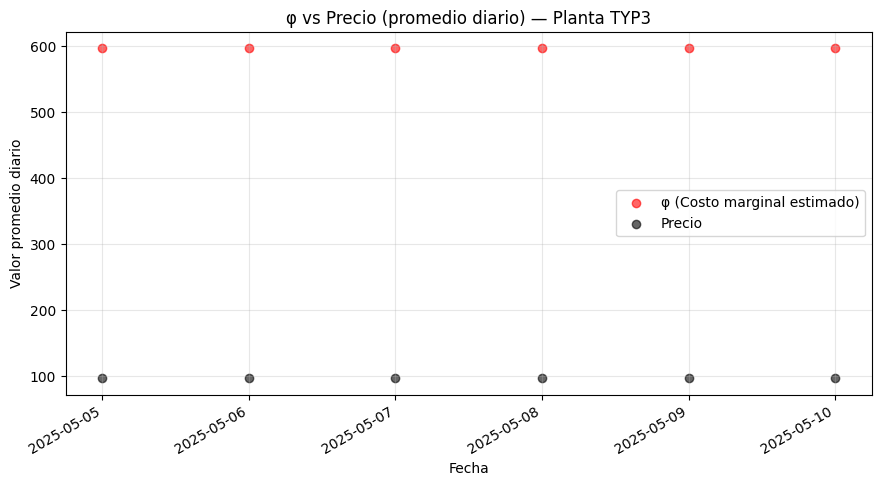

✅ Gráfico guardado: results\phi_precio_TYP3_2025-05-05_to_2025-05-10_M1.png


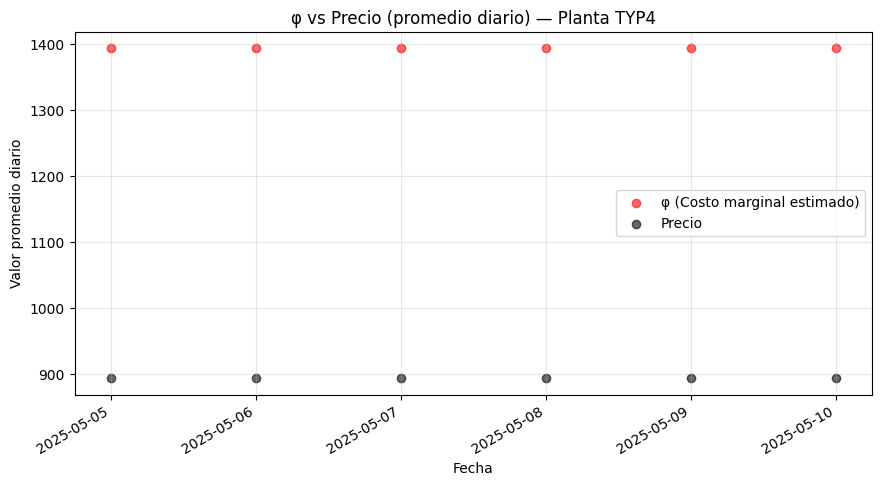

✅ Gráfico guardado: results\phi_precio_TYP4_2025-05-05_to_2025-05-10_M1.png


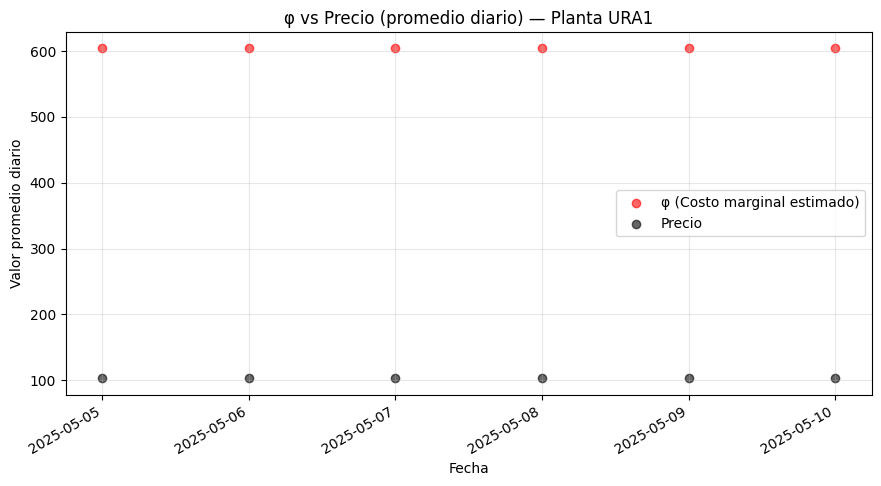

✅ Gráfico guardado: results\phi_precio_URA1_2025-05-05_to_2025-05-10_M1.png


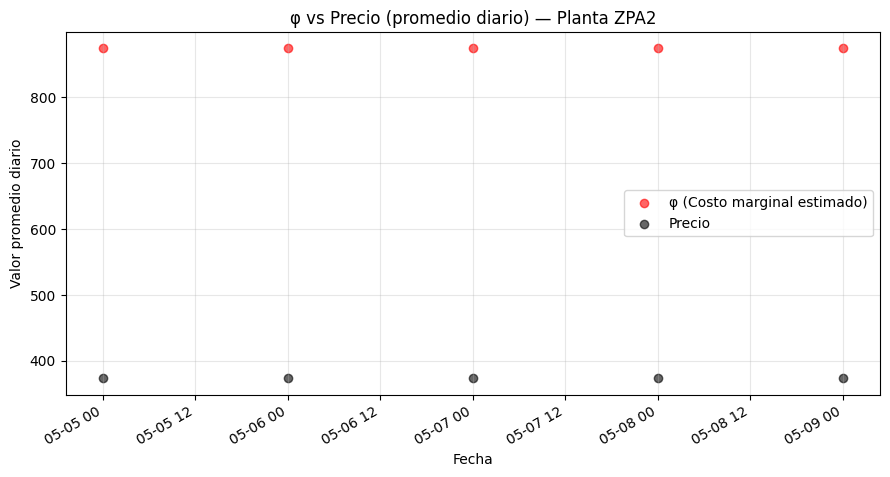

✅ Gráfico guardado: results\phi_precio_ZPA2_2025-05-05_to_2025-05-09_M1.png


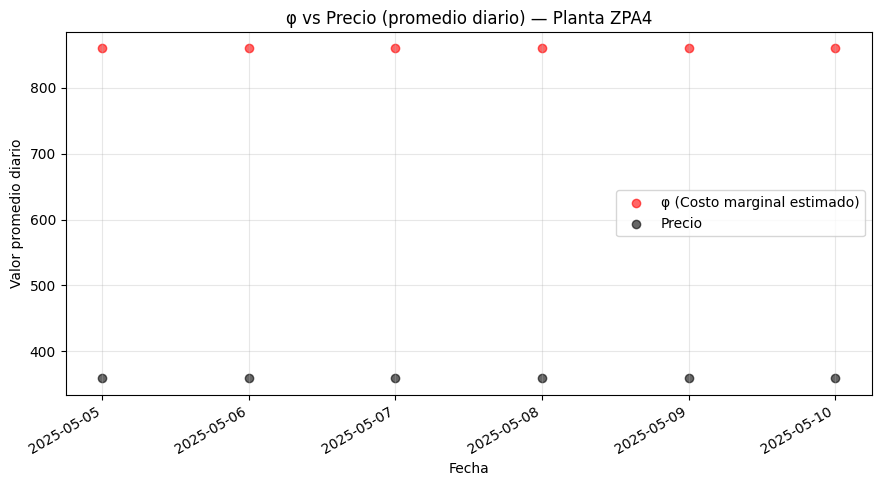

✅ Gráfico guardado: results\phi_precio_ZPA4_2025-05-05_to_2025-05-10_M1.png


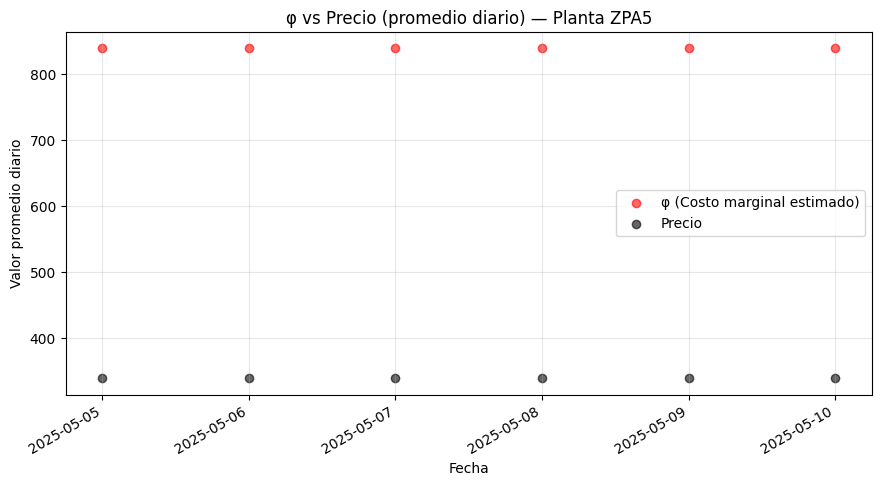

✅ Gráfico guardado: results\phi_precio_ZPA5_2025-05-05_to_2025-05-10_M1.png


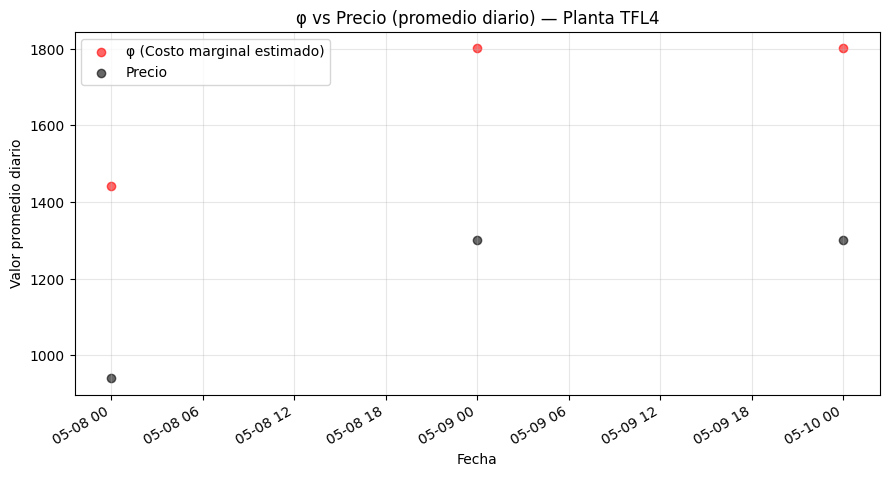

✅ Gráfico guardado: results\phi_precio_TFL4_2025-05-08_to_2025-05-10_M1.png


In [114]:
import os
import matplotlib.pyplot as plt
import pandas as pd

M=1
# --- Asegurar formatos ---
df_result2['phi'] = pd.to_numeric(df_result2['phi'], errors='coerce')
df_result2['precio_d'] = pd.to_numeric(df_result2['precio_d'], errors='coerce')


# --- Filtrar filas válidas ---
df_result2 = df_result2.dropna(subset=['Fecha', 'CodigoPlanta', 'phi', 'precio_d'])

# --- Iterar sobre cada planta ---
for planta in df_result2['CodigoPlanta'].unique():
    df_planta = (
        df_result2[df_result2['CodigoPlanta'] == planta]
        .groupby('Fecha', as_index=False)[['phi', 'precio_d']].mean()
        .sort_values('Fecha')
    )

    plt.figure(figsize=(9, 5))
    plt.scatter(df_planta['Fecha'], df_planta['phi'], color='red', label='φ (Costo marginal estimado)', alpha=0.6)
    plt.scatter(df_planta['Fecha'], df_planta['precio_d'], color='black', label='Precio', alpha=0.6)

    plt.xlabel("Fecha")
    plt.ylabel("Valor promedio diario")
    plt.title(f"φ vs Precio (promedio diario) — Planta {planta}")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.gcf().autofmt_xdate()

    # --- Guardar figura ---
    fecha_min = df_planta['Fecha'].min()
    fecha_max = df_planta['Fecha'].max()
    filename = f"phi_precio_{planta}_{fecha_min}_to_{fecha_max}_M{M}.png"
    filepath = os.path.join(sub_dir, filename)
    plt.savefig(filepath, dpi=300)
    plt.show()

    print(f"✅ Gráfico guardado: {filepath}")




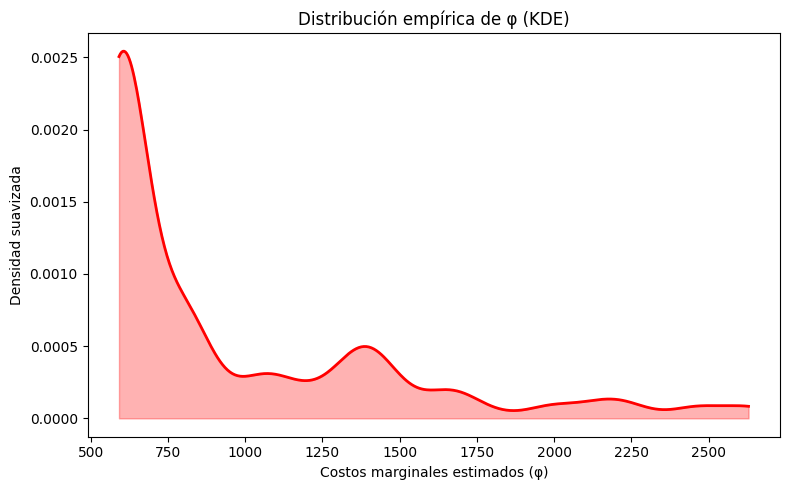

In [188]:
from scipy.stats import gaussian_kde
import numpy as np
import matplotlib.pyplot as plt

phi = pd.to_numeric(df_result2['phi'], errors='coerce').dropna()

# Calcular densidad KDE
kde = gaussian_kde(phi)
x_vals = np.linspace(phi.min(), phi.max(), 500)
y_vals = kde(x_vals)

plt.figure(figsize=(8,5))
plt.plot(x_vals, y_vals, color="red", linewidth=2)
plt.fill_between(x_vals, y_vals, color="red", alpha=0.3)
plt.xlabel("Costos marginales estimados (φ)")
plt.ylabel("Densidad suavizada")
plt.title("Distribución empírica de φ (KDE)")
plt.tight_layout()
plt.show()




In [171]:
df_result2['phi'].describe()

count    9449.000000
mean      951.309056
std       508.627593
min       591.300000
25%       602.640000
50%       610.860000
75%      1210.300000
max      2629.060000
Name: phi, dtype: float64